## Вводные по кейсу

Цель исследования: исследовать метрики маркетплейса на предмет потенциальных проблем, тревожных сигналов и инсайтов.

Этап 1: Верхнеуровневый обзор метрик

Этап 2: Оценка метрик монетизации и юнит-экономики

Этап 3: Поиск инсайтов, точек роста и сегментация

Исследование проводилась на данных маркетплейса за 2024 год.

# Описание данных

## Таблица `Users`

| Поле              | Описание                                       |
|-------------------|------------------------------------------------|
| `user_id`         | Уникальный идентификатор пользователя.         |
| `registration_date` | Дата регистрации пользователя.                |
| `age`             | Возраст пользователя.                          |
| `gender`          | Пол.                                |
| `region`          | Регион.                                        |
| `acq_channel`     | Канал привлечения.                             |
| `buyer_segment`   | Сегмент покупателя.                            |
| `cohort_week`     | Неделя привлечения.|
| `cohort_month`    | Месяц привлечения. |

---

## Таблица `Events`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `event_id`    | Уникальный идентификатор события.                                        |
| `user_id`     | Идентификатор пользователя.                                              |
| `event_date`  | Дата события.                                                            |
| `event_type`  | Тип события.   |
| `os`          | Операционная система.               |
| `device`      | Тип устройства.                                |
| `product_name`| Наименование товара, к которому относится событие (если применимо).      |
| `event_week`  | Неделя события.                                          |
| `event_month` | Месяц события .                                           |

---

## Таблица `Orders`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `order_id`    | Уникальный идентификатор заказа.                                         |
| `user_id`     | Идентификатор пользователя, который сделал заказ |
| `order_date`  | Дата и время оформления заказа.                                          |
| `product_name`| Наименование товара.                                                     |
| `quantity`    | Количество единиц товара в заказе.                                       |
| `unit_price`  | Цена за одну единицу товара.                                             |
| `total_price` | Итоговая сумма заказа.                                                   |
| `category_name` | Наименование категории товара.                                         |
| `order_week`  | Неделя заказа.                                           |
| `order_month` | Месяц заказа.                                            |


## Таблица `Campaign_costs`

| Поле         | Описание                                                                 |
|--------------|--------------------------------------------------------------------------|
| `acq_channel`| Канал привлечения.  |
| `spend_month`| Месяц, в который был потрачен бюджет (отражает период, в котором были привлечены пользователи)                      |
| `budget`     | Маркетинговый бюджет (в денежном выражении), потраченный на данный канал в указанном месяце.                           |



## Описание событий

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |


## Выручка маркетплейса = 5% от total_price

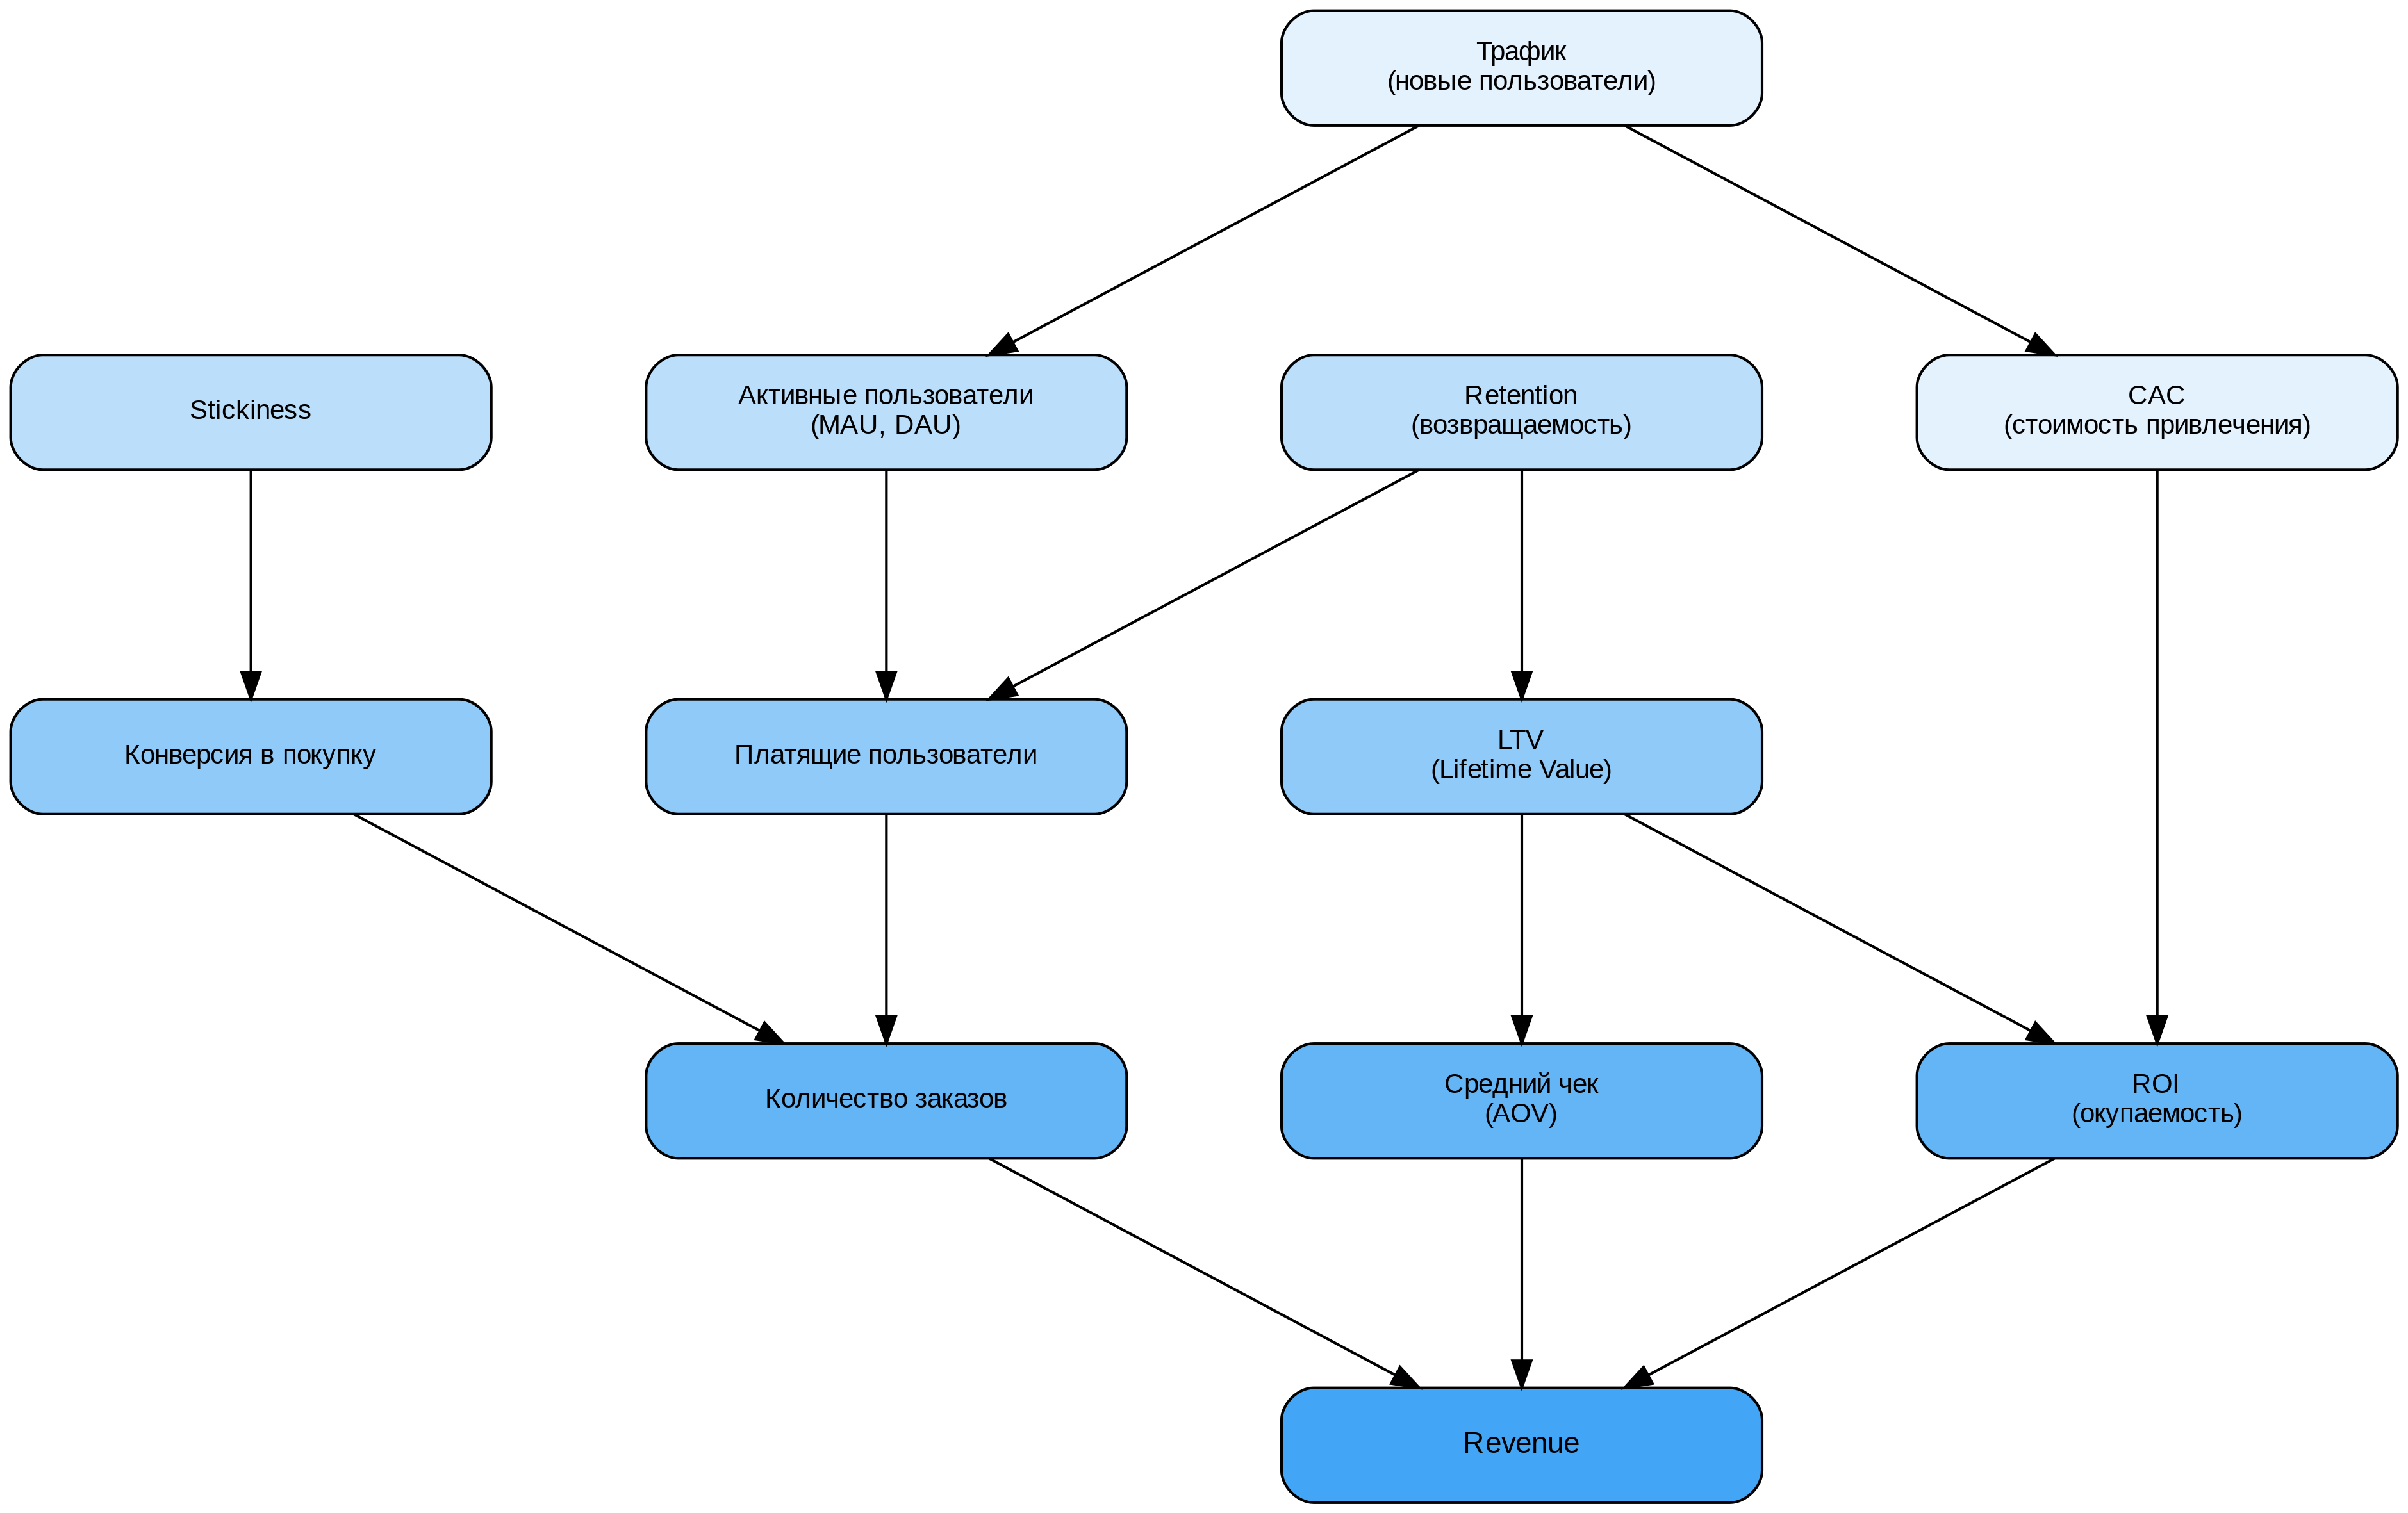

In [2]:
from IPython.display import Image, display
import graphviz

def create_elegant_marketplace_tree():
    # Создаем граф с настройками
    dot = graphviz.Digraph('ElegantMarketplaceTree')
    dot.attr(rankdir='TB', size='20,16', bgcolor='white', dpi='300')
    dot.attr('node',
             style='filled,rounded',
             shape='box',
             fontname='Arial',
             fontsize='10',
             height='0.6',
             width='2.5',
             fixedsize='true')

    # Цветовая палитра - градиент голубого
    blue_gradient = [
        '#E3F2FD',  # Уровень 4 - самый светший
        '#BBDEFB',  # Уровень 3
        '#90CAF9',  # Уровень 2
        '#64B5F6',  # Уровень 1
        '#42A5F5'   # Уровень 0 - самый темный
    ]

    # 🎯 УРОВЕНЬ 0 - ФИНАНСОВЫЕ МЕТРИКИ
    dot.node('revenue', 'Revenue',
             fillcolor=blue_gradient[4], fontsize='11')

    # 📊 УРОВЕНЬ 1 - ОСНОВНЫЕ ДРАЙВЕРЫ
    dot.node('orders', 'Количество заказов', fillcolor=blue_gradient[3])
    dot.node('aov', 'Средний чек\n(AOV)', fillcolor=blue_gradient[3])
    dot.node('roi', 'ROI\n(окупаемость)', fillcolor=blue_gradient[3])

    # 👥 УРОВЕНЬ 2 - МЕТРИКИ ПОЛЬЗОВАТЕЛЕЙ
    dot.node('paying_users', 'Платящие пользователи', fillcolor=blue_gradient[2])
    dot.node('conversion_rate', 'Конверсия в покупку', fillcolor=blue_gradient[2])
    dot.node('ltv', 'LTV\n(Lifetime Value)', fillcolor=blue_gradient[2])

    # 📈 УРОВЕНЬ 3 - МЕТРИКИ АКТИВНОСТИ
    dot.node('active_users', 'Активные пользователи\n(MAU, DAU)', fillcolor=blue_gradient[1])
    dot.node('stickiness', 'Stickiness', fillcolor=blue_gradient[1])
    dot.node('retention', 'Retention\n(возвращаемость)', fillcolor=blue_gradient[1])

    # 🚀 УРОВЕНЬ 4 - МЕТРИКИ ПРИВЛЕЧЕНИЯ
    dot.node('traffic', 'Трафик\n(новые пользователи)', fillcolor=blue_gradient[0])
    dot.node('cac', 'CAC\n(стоимость привлечения)', fillcolor=blue_gradient[0])

    # 🔗 СВЯЗИ МЕЖДУ УРОВНЯМИ
    # Уровень 1 -> Уровень 0
    dot.edges([
        ('orders', 'revenue'),
        ('aov', 'revenue'),
        ('roi', 'revenue')
    ])

    # Уровень 2 -> Уровень 1
    dot.edges([
        ('paying_users', 'orders'),
        ('conversion_rate', 'orders'),
        ('ltv', 'aov'),  # LTV влияет на средний чек
        ('ltv', 'roi')   # LTV влияет на ROI
    ])

    # Уровень 3 -> Уровень 2
    dot.edges([
        ('active_users', 'paying_users'),
        ('stickiness', 'conversion_rate'),
        ('retention', 'paying_users'),
        ('retention', 'ltv')  # Retention влияет на LTV
    ])

    # Уровень 4 -> Уровень 3
    dot.edges([
        ('traffic', 'active_users'),
        ('traffic', 'cac'),   # Трафик влияет на CAC
        ('cac', 'roi')        # CAC влияет на ROI
    ])

    # Настраиваем отступы между уровнями
    dot.attr(ranksep='1.2')
    dot.attr(nodesep='0.8')

    # Отображаем дерево
    display(Image(dot.pipe(format='png')))

    return dot

# Создаем и отображаем элегантное дерево метрик
elegant_tree = create_elegant_marketplace_tree()

## Определения метрик

### **ФИНАНСОВЫЕ МЕТРИКИ**

**Revenue (Выручка)**
- **Определение:** Суммарный доход от всех совершенных покупок за период
- **Расчет:** Сумма всех успешных транзакций
- **Стратегическая важность:** 🔴 **ВЫСОКАЯ** - ключевой показатель успеха бизнеса

---

### **ОСНОВНЫЕ ДРАЙВЕРЫ**

**Количество заказов**
- **Определение:** Общее число успешно завершенных покупок
- **Расчет:** COUNT(DISTINCT order_id) с статусом "completed"
- **Стратегическая важность:** 🔴 **ВЫСОКАЯ** - прямой драйвер выручки

**AOV (Average Order Value) - Средний чек**
- **Определение:** Средняя сумма одного заказа
- **Расчет:** Total Revenue / Количество заказов
- **Стратегическая важность:** 🔴 **ВЫСОКАЯ** - определяет монетизационную эффективность

**ROI (Return on Investment) - Окупаемость инвестиций**
- **Определение:** Отношение дохода к затратам на маркетинг
- **Расчет:** (Revenue - Marketing Costs) / Marketing Costs * 100%
- **Стратегическая важность:** 🔴 **ВЫСОКАЯ** - определяет эффективность маркетинговых инвестиций

---

### **МЕТРИКИ ПОЛЬЗОВАТЕЛЕЙ**

**Платящие пользователи**
- **Определение:** Уникальные пользователи, совершившие хотя бы одну покупку
- **Расчет:** COUNT(DISTINCT user_id) из таблицы заказов
- **Стратегическая важность:** 🟡 **СРЕДНЯЯ** - важно для понимания базы покупателей

**Конверсия в покупку**
- **Определение:** Процент пользователей, которые совершили покупку от всех зарегистрированных
- **Расчет:** (Платящие пользователи / Все пользователи) * 100%
- **Стратегическая важность:** 🟡 **СРЕДНЯЯ** - показатель эффективности воронки

**LTV (Lifetime Value) - Ценность жизненного цикла**
- **Определение:** Суммарный доход, который приносит один пользователь за все время
- **Расчет:** Средний доход с пользователя * Среднее время жизни
- **Стратегическая важность:** 🔴 **ВЫСОКАЯ** - определяет максимальные допустимые затраты на привлечение

---

### **МЕТРИКИ АКТИВНОСТИ**

**Активные пользователи (MAU, DAU)**
- **Определение:** Уникальные пользователи, совершившие любое действие в приложении
- **MAU:** за 30 дней, **DAU:** за 1 день
- **Стратегическая важность:** 🟡 **СРЕДНЯЯ** - индикатор здоровья продукта

**Stickiness (Прилипчивость)**
- **Определение:** Насколько часто пользователи возвращаются в приложение
- **Расчет:** DAU / MAU * 100%
- **Стратегическая важность:** 🟡 **СРЕДНЯЯ** - показатель регулярного использования

**Retention (Удержание)**
- **Определение:** Способность удерживать пользователей в долгосрочной перспективе
- **Расчет:** % пользователей, возвращающихся через N дней/месяцев
- **Стратегическая важность:** 🔴 **ВЫСОКАЯ** - ключ к долгосрочному успеху и LTV

---

### **МЕТРИКИ ПРИВЛЕЧЕНИЯ**

**Трафик (Новые пользователи)**
- **Определение:** Количество новых регистраций/установок приложения
- **Расчет:** COUNT(DISTINCT user_id) с датой регистрации в периоде
- **Стратегическая важность:** 🟢 **БАЗОВАЯ** - входная метрика роста

**CAC (Customer Acquisition Cost) - Стоимость привлечения**
- **Определение:** Средние затраты на привлечение одного пользователя
- **Расчет:** Total Marketing Costs / Количество новых пользователей
- **Стратегическая важность:** 🔴 **ВЫСОКАЯ** - определяет экономику роста (LTV > CAC)

---

## **СТРАТЕГИЧЕСКИ ВАЖНЫЕ МЕТРИКИ**

1. **Revenue** - конечная цель бизнеса
2. **LTV** - определяет ценность пользователя и максимальные CAC
3. **CAC** - определяет эффективность маркетинга
4. **ROI** - окупаемость инвестиций в маркетинг
5. **Retention** - основа долгосрочного успеха и LTV
6. **AOV** - эффективность монетизации
7. **Количество заказов** - объем бизнеса

Эти 7 метрик составляют **стратегическое ядро** для принятия ключевых бизнес-решений. Остальные метрики являются поддерживающими и диагностическими.

# Блок кода и расчета метрик

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('darkgrid', {'axes.facecolor':'.9', 'grid.color':'white'})

In [ ]:
orders = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_marketplace_orders.csv',
    parse_dates=['order_date']
)
orders['order_date'] = orders['order_date'].dt.date

campaign_costs = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_marketplace_campaign_costs.csv',
    parse_dates=['spend_month']
)
campaign_costs['spend_month'] = campaign_costs['spend_month'].dt.date

users = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_marketplace_users.csv',
    parse_dates=['registration_date']
)
users['registration_date'] = users['registration_date'].dt.date

events = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_marketplace_events.csv',
    parse_dates=['event_date']
)
events['event_date'] = events['event_date'].dt.date

In [ ]:
for df, df_name, date in zip([orders, campaign_costs, users, events], ['orders', 'campaign_costs', 'users', 'events'], ['order_date', 'spend_month', 'registration_date', 'event_date']):
  print(f'Сведения о таблице {df_name}')
  df.info()
  df.drop_duplicates()
  min_date = df[date].min()
  max_date = df[date].max()
  print(f'\nДанные представлены за период с {min_date} по {max_date}')
  display(df.head())
  print('\n\n')


Сведения о таблице orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       31357 non-null  int64  
 1   user_id        31357 non-null  int64  
 2   order_date     31357 non-null  object 
 3   product_name   31357 non-null  object 
 4   quantity       31357 non-null  int64  
 5   unit_price     31357 non-null  float64
 6   total_price    31357 non-null  float64
 7   category_name  31357 non-null  object 
 8   order_week     31357 non-null  object 
 9   order_month    31357 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.4+ MB

Данные представлены за период с 2024-01-01 по 2024-12-31


,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01





Сведения о таблице campaign_costs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   88 non-null     int64  
 1   acq_channel  88 non-null     object 
 2   spend_month  88 non-null     object 
 3   budget       88 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB

Данные представлены за период с 2024-01-01 по 2025-01-01


,Unnamed: 0,acq_channel,spend_month,budget
0,0,Affiliate,2024-01-01,179343.3875
1,1,Affiliate,2024-02-01,175488.4875
2,2,Affiliate,2024-03-01,164543.4750
3,3,Affiliate,2024-04-01,186869.9750
4,4,Affiliate,2024-05-01,166443.7750





Сведения о таблице users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            44151 non-null  int64 
 1   registration_date  44151 non-null  object
 2   age                44151 non-null  int64 
 3   gender             44151 non-null  object
 4   region             44151 non-null  object
 5   acq_channel        44151 non-null  object
 6   buyer_segment      44151 non-null  object
 7   cohort_week        44151 non-null  object
 8   cohort_month       44151 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.0+ MB

Данные представлены за период с 2024-01-01 по 2024-12-31


,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,1,2024-01-01,35,M,Москва,Google Ads,regular,2024-01-01,2024-01-01
1,2,2024-01-01,53,M,Москва,Email Marketing,rare,2024-01-01,2024-01-01
2,3,2024-01-01,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01
3,4,2024-01-01,58,M,Краснодар,Affiliate,one_time,2024-01-01,2024-01-01
4,5,2024-01-01,58,F,Другие регионы,Google Ads,regular,2024-01-01,2024-01-01





Сведения о таблице events
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event_id      785859 non-null  int64 
 1   user_id       785859 non-null  int64 
 2   event_date    785859 non-null  object
 3   event_type    785859 non-null  object
 4   os            785859 non-null  object
 5   device        785859 non-null  object
 6   product_name  385740 non-null  object
 7   event_week    785859 non-null  object
 8   event_month   785859 non-null  object
dtypes: int64(2), object(7)
memory usage: 54.0+ MB

Данные представлены за период с 2024-01-01 по 2024-12-31


,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


In [ ]:
print(orders.duplicated(subset=['user_id', 'order_date', 'product_name', 'quantity',
       'unit_price', 'total_price', 'category_name', 'order_week',
       'order_month']).sum())

272


In [ ]:
orders = orders.drop_duplicates(subset=['user_id', 'order_date', 'product_name', 'quantity',
       'unit_price', 'total_price', 'category_name', 'order_week',
       'order_month'])

In [ ]:
campaign_costs = campaign_costs[campaign_costs['spend_month'] < pd.to_datetime('2025-01-01').date()]

In [ ]:
orders[['unit_price', 'total_price']].describe()

,unit_price,total_price
count,31085.000000,31085.000000
mean,6992.144430,14038.026273
std,8177.299261,18689.159532
min,339.000000,339.000000
25%,2122.440000,3776.740000
50%,4406.630000,7554.640000
75%,9395.950000,17657.460000
max,63932.380000,191797.140000


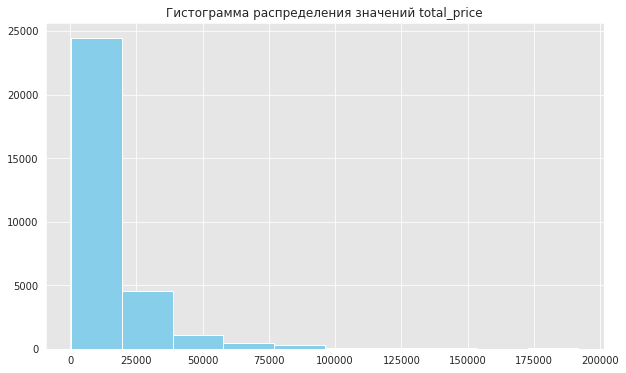

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(orders['total_price'], color='skyblue')

plt.title('Гистограмма распределения значений total_price')
plt.show()

In [ ]:
orders = orders[orders['total_price'] < orders['total_price'].quantile(0.98)]

Данные не содержат ошибок или неожиданных пропусков (пропуски в таблице `events` в столбце `product_name` объяснимы тем, что не все события связаны с товарами), столбцы приведены к нужным форматам, оставлены только донные за 2024 год, выбросы по сумме заказа удалены.

### 2. Построить обзор ключевых метрик

Выполним на данном этапе верхнеуровневую оценку состояния продукта с помощью собранных витрин. Оценим текущее состояние продукта — без глубокой сегментации и оценки сложных метрик.

Выручка бизнеса — 5% комиссии от стоимости любой продажи.

Посмотрим на общую динамику ключевых метрик: Revenue, ARPU или ARPPU, MAU, WAU, DAU, AOV, Retention, CTR, CR в заказ.

Цель — быстро получить целостную картину, не применяя сегментацию и не рассматривая глубокие срезы. Определите, соответствует ли продукт базовым ожиданиям, виден ли рост, есть ли тревожные сигналы.


Начнем обзор с пользовательских метрик.

Text(0, 0.5, 'Количество привлеченных пользователей')

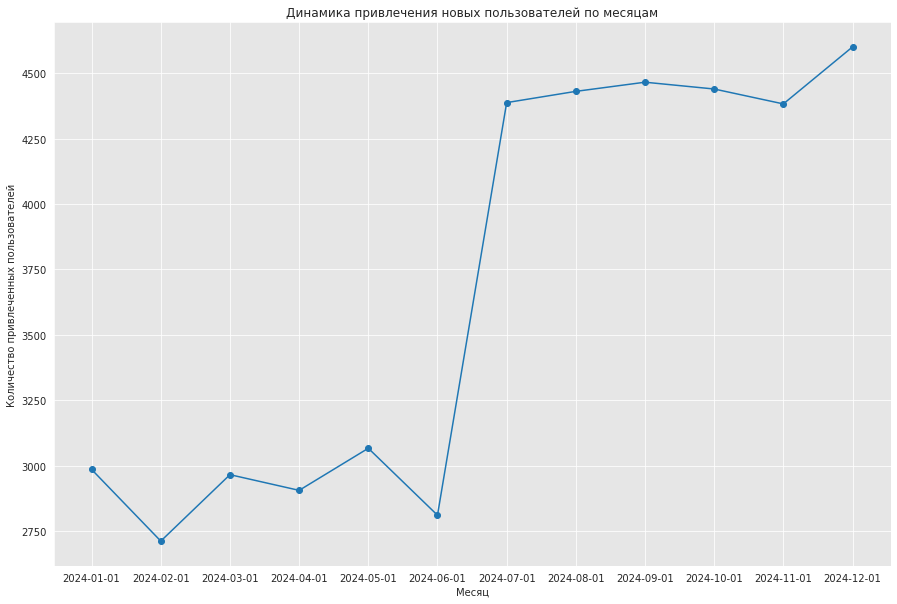

In [ ]:
monthly_reg = users.groupby('cohort_month')['user_id'].nunique().reset_index()

plt.figure(figsize=(15, 10))

plt.plot(monthly_reg['cohort_month'], monthly_reg['user_id'], marker='o')

plt.title('Динамика привлечения новых пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество привлеченных пользователей')

Судя по всему, в июне у продукта изменилась маркетинговая кампания, возможно, появился новый канал трафика, количество привлекаемых пользователей в месяц выросло в полтора раза.

In [ ]:
dau = events.groupby(['event_date', 'event_month'])['user_id'].nunique().reset_index(name='DAU')
mau = events.groupby('event_month')['user_id'].nunique().reset_index(name='MAU')
monthly_dau = dau.groupby('event_month')['DAU'].mean().reset_index(name='monthly_dau')
mau_dau_stickiness = pd.merge(dau, mau, on='event_month', how='outer')
mau_dau_stickiness = pd.merge(mau_dau_stickiness, monthly_dau, on='event_month', how='outer')
mau_dau_stickiness['stickiness'] = mau_dau_stickiness['monthly_dau'] / mau_dau_stickiness['MAU'] * 100

Text(0, 0.5, 'stickiness ratio (%)')

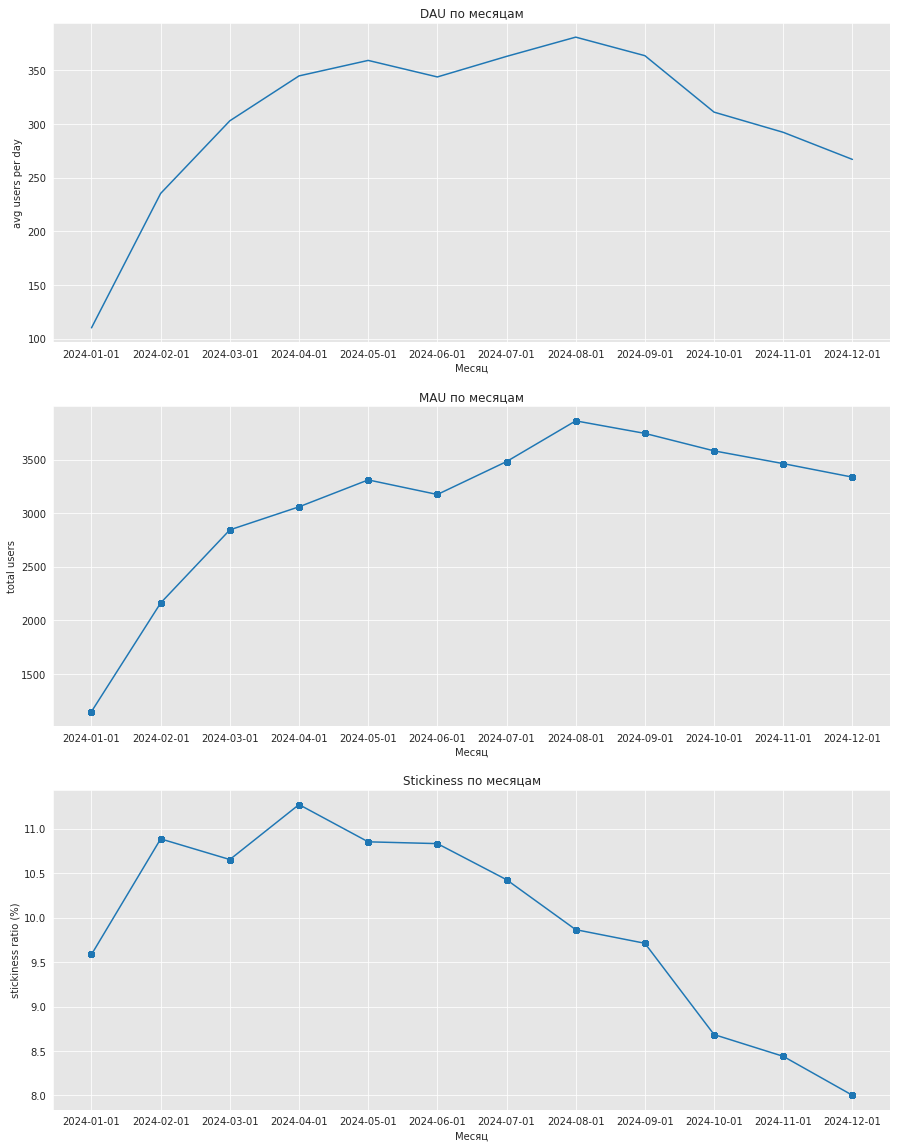

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

ax1.plot(mau_dau_stickiness['event_month'], mau_dau_stickiness['monthly_dau'])

ax1.set_title('DAU по месяцам')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('avg users per day')

ax2.plot(mau_dau_stickiness['event_month'], mau_dau_stickiness['MAU'], marker='o')

ax2.set_title('MAU по месяцам')
ax2.set_xlabel('Месяц')
ax2.set_ylabel('total users')

ax3.plot(mau_dau_stickiness['event_month'], mau_dau_stickiness['stickiness'], marker='o')

ax3.set_title('Stickiness по месяцам')
ax3.set_xlabel('Месяц')
ax3.set_ylabel('stickiness ratio (%)')

До августа 2024 года количество активных юзеров росло, после августа стали уменьшаться и MAU, и DAU.

Коэффициент "залипательности" при этом начал снижаться уже начиная с июня, за последующие полгода стало более чем на 2-3% меньше пользователей, которые заходят в приложение ежедневно, что может негативно сказываться на выручке.

Вероятно, снизился и retention.

Рассмотрим месячные когорты платящих (совершил хотя бы одну покупку) пользователей на возвращаемость к покупке (после первой покупки).

In [ ]:
retention_data = pd.merge(
    users[['user_id', 'cohort_month']],
    orders[['user_id', 'order_month']],
    on='user_id',
    how='left')

retention_data['n_period'] = (pd.to_datetime(retention_data['order_month']).dt.month - pd.to_datetime(retention_data['cohort_month']).dt.month).fillna(0).astype('int')

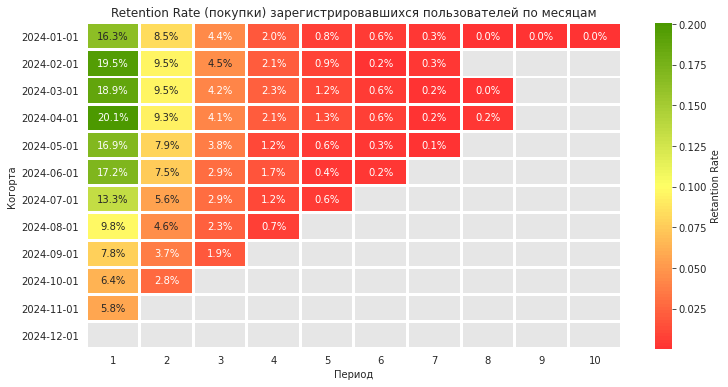

In [ ]:

import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)

df_pivot = retention_data.groupby(['cohort_month', 'n_period'])['user_id'].nunique().reset_index(
  ).pivot(index='cohort_month', columns='n_period', values='user_id')

df_pivot_retention = df_pivot.div(df_pivot[0], axis=0)
df_pivot_retention[df_pivot_retention == 0] = float('nan')

plt.figure(figsize=(12, 6))

# Убираем период 0, так как он всегда равен 100
df_pivot_retention = df_pivot_retention.drop(columns=[0])

sns.heatmap(df_pivot_retention,
          cmap=cmap,
          annot=True,
          fmt='.1%',
          linewidths=2,
          cbar_kws={'label' : 'Retantion Rate'})

plt.title('Retention Rate (покупки) зарегистрировавшихся пользователей по месяцам')
plt.xlabel('Период')
plt.ylabel('Когорта')
plt.show()

После апреля retention начал постепенно падать во всех когортах.
Оценим конверсию из регистрации в покупку по месяцам.

Text(0, 0.5, 'CR')

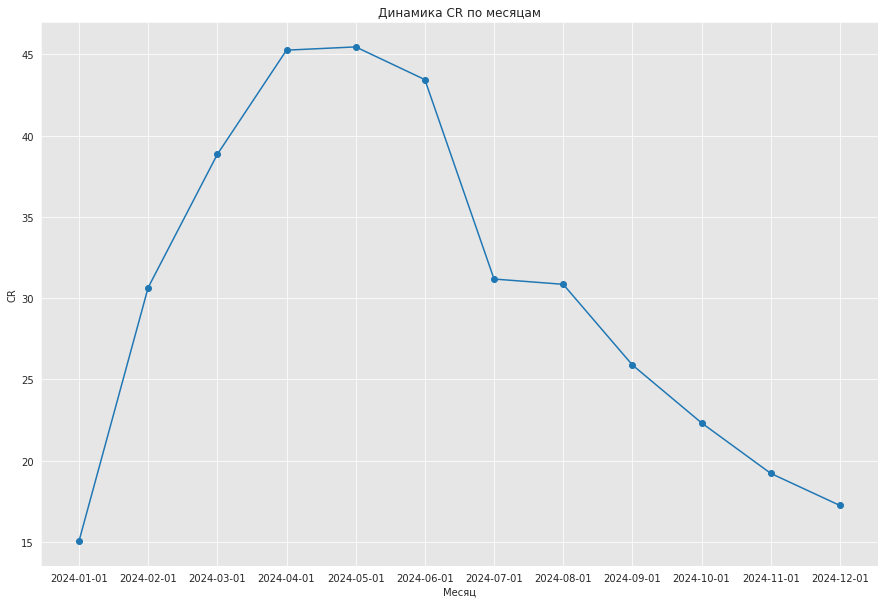

In [ ]:
monthly_registrations = users.groupby('cohort_month')['user_id'].nunique().reset_index(name = 'registered_users')

monthly_orders = orders.groupby('order_month')['user_id'].nunique().reset_index(name = 'total_orders')

conversion_df = pd.merge(monthly_registrations,
                            monthly_orders,
                            left_on='cohort_month',
                            right_on='order_month',
                            how='inner')

conversion_df['conversion_rate'] = (conversion_df['total_orders'] / conversion_df['registered_users']) * 100

conversion_df = conversion_df.fillna(0)

plt.figure(figsize=(15, 10))

plt.plot(conversion_df['cohort_month'], conversion_df['conversion_rate'], marker='o')

plt.title('Динамика CR по месяцам')
plt.xlabel('Месяц')
plt.ylabel('CR')

После апреля 2024 года конверсия из регистрации в покупку начала страмительно падать. Совпадает со спадом Stickiness.

Возможно, в апреле 2024 года что-то изменилось в маркетинговой кампании продукта. Количество пользователей продолжало расти, однако трафик был некачественным, пользователи не были заинтересованы и не стали лояльными, из-за чего резко упала конверсия.

При этом значительный рост привлеченных пользователей произошел только в июне, что может свидетельствовать о том, что в апреле произошли проблемы с трафиком по старым каналам, а в июне, чтобы эту ситуацию исправить продукт стал привлекать новый трафик.

In [ ]:
total_revenue = orders['total_price'].sum() * 0.05
total_campaign_budjet = campaign_costs['budget'].sum()

Text(0.5, 0.01, 'Суммарная выручка за год: 18,455,673.94, за вычетом затрат на маркетинг: 17762211.202')

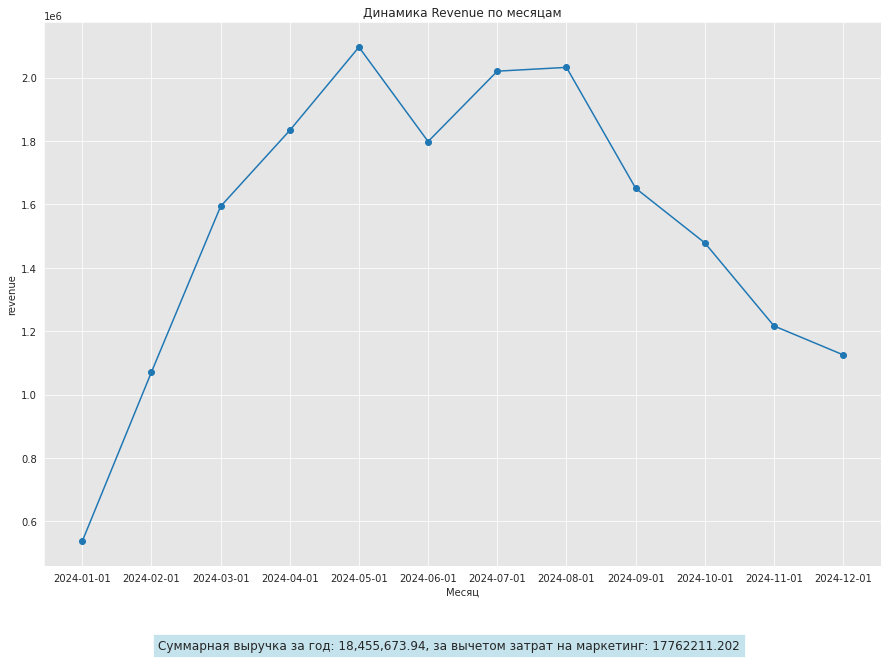

In [ ]:
monthly_revenue = orders.groupby('order_month')['total_price'].sum().reset_index(name='revenue')
monthly_revenue['revenue'] = monthly_revenue['revenue'] * 0.05

plt.figure(figsize=(15, 10))

plt.plot(monthly_revenue['order_month'], monthly_revenue['revenue'], marker='o')

plt.title('Динамика Revenue по месяцам')
plt.xlabel('Месяц')
plt.ylabel('revenue')

plt.figtext(0.5, 0.01, f'Суммарная выручка за год: {total_revenue:,.2f}, за вычетом затрат на маркетинг: {total_campaign_budjet}',
            ha='center', fontsize=12, bbox={'facecolor': 'lightblue', 'alpha': 0.7, 'pad': 5})


На графике помесячной динамики выручки маркетплейса видно, что с начала года до мая доход стремительно рос, с апреля по август вошел в стагнацию, а после августа начал снижаться. Суммарно за год маркетплейс заработал 22 миллиона, а за вычетом расходов на маркетинг - 18 миллионов.

### 3. Оценка метрик монетизации и юнит-экономики

Анализ монетизации. Определим, сколько зарабатывает продукт и сколько тратит на привлечение.

Рассчитаем как агрегированные метрики (ARPU, AOV), так и показатели эффективности (CAC, ROI, Payback Period).


In [ ]:
print('Доля платящих пользователей от всех зарегистрировавшихся', round(orders['user_id'].nunique() / users['user_id'].nunique() * 100, 2), '%')

Доля платящих пользователей от всех зарегистрировавшихся 20.06 %


Text(0, 0.5, 'Доля платящих пользователей')

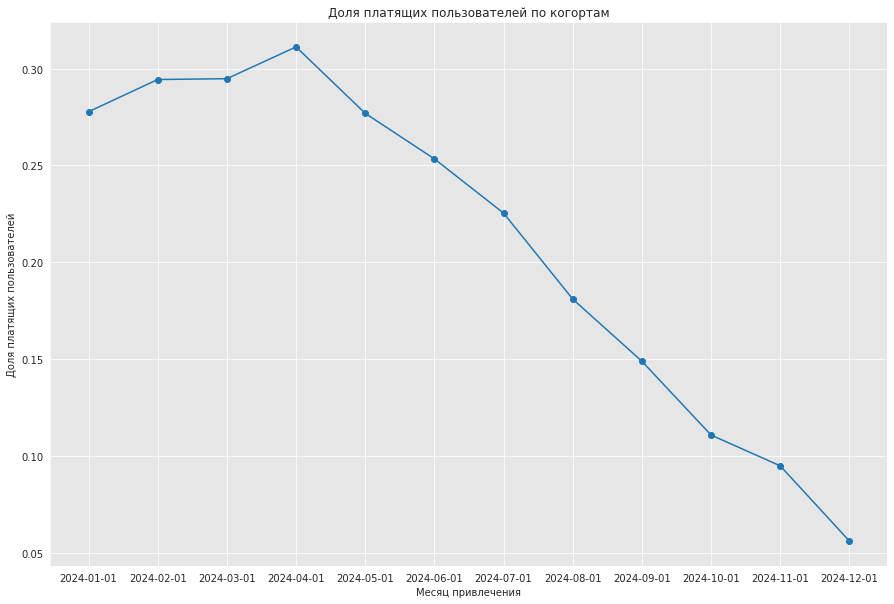

In [ ]:
payers = users[users['user_id'].isin(orders['user_id'])].groupby('cohort_month')['user_id'].nunique().reset_index(name='payers_count')
payers_ratio = pd.merge(
    monthly_reg,
    payers,
    on='cohort_month',
    how='inner'
)
payers_ratio['ratio'] = payers_ratio['payers_count'] / payers_ratio['user_id']

plt.figure(figsize=(15, 10))

plt.plot(payers_ratio['cohort_month'], payers_ratio['ratio'], marker='o')

plt.title('Доля платящих пользователей по когортам')
plt.xlabel('Месяц привлечения')
plt.ylabel('Доля платящих пользователей')

С апреля 2024 года доля платящих пользователей снизилась примерно на 25%.

За все время доля платящих пользователей от всех зарегистрировавшихся составляет 20%.

Text(0, 0.5, 'AOV')

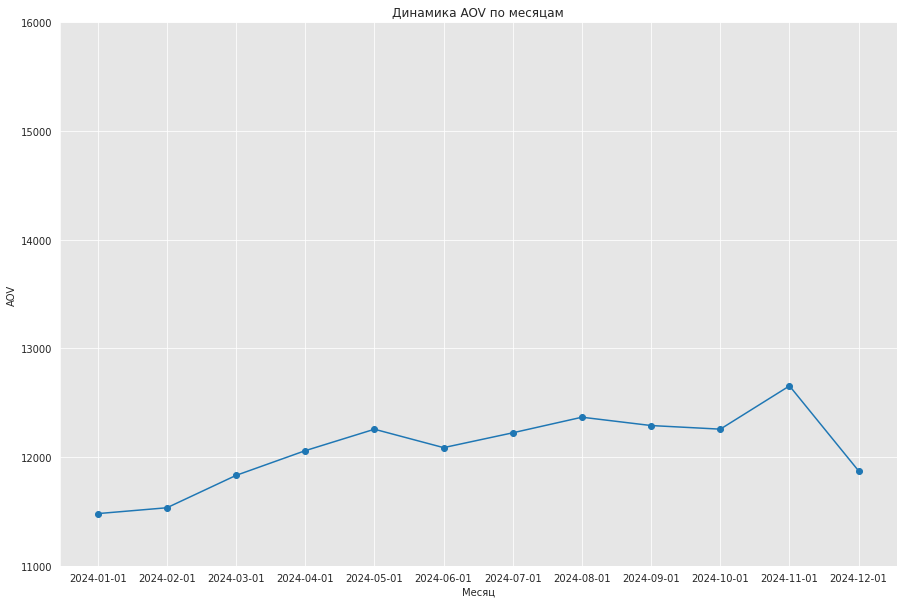

In [ ]:
monthly_aov = orders.groupby('order_month')['total_price'].mean().reset_index(name='aov')

plt.figure(figsize=(15, 10))

plt.plot(monthly_aov['order_month'], monthly_aov['aov'], marker='o')

plt.ylim(11000, 16000)
plt.title('Динамика AOV по месяцам')
plt.xlabel('Месяц')
plt.ylabel('AOV')

Средняя стоимость заказа не показывает серьезного роста или спада на протяжение года, значит, падение выручки связано с количеством заказов, а не средним чеком.

Text(0, 0.5, 'Количество заказов')

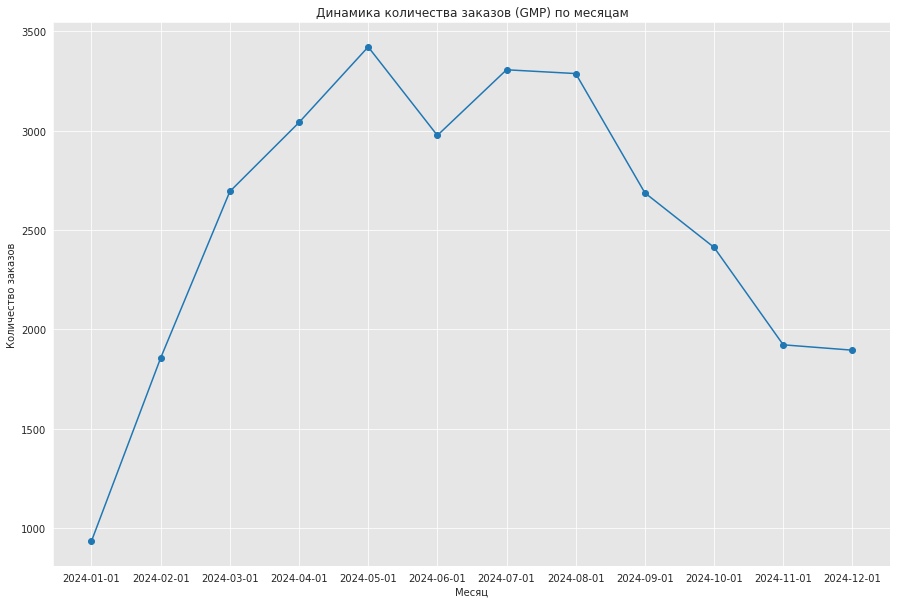

In [ ]:
monthly_order_count = orders.groupby('order_month')['order_id'].nunique().reset_index(name='order_count')

plt.figure(figsize=(15, 10))

plt.plot(monthly_order_count['order_month'], monthly_order_count['order_count'], marker='o')

plt.title('Динамика количества заказов (GMP) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')

На графике динамики количества заказов видим тренд, идентичный динамике выручки. Падение доходности маркетплейса связано со снижением количества заказов. Это соответсвует выводам на основе пользовательских метрик: юзеры стали менее активными.

Оценим средний доход на платящих пользователей и на всех пользователей. Если ARPPU стабилен, а ARPU падает, это может косвенно подтверждать предыдущие предположения о некачественном трафике пользователей, которые не совершают заказы.

Text(0, 0.5, 'Средний доход на платящего пользователя')

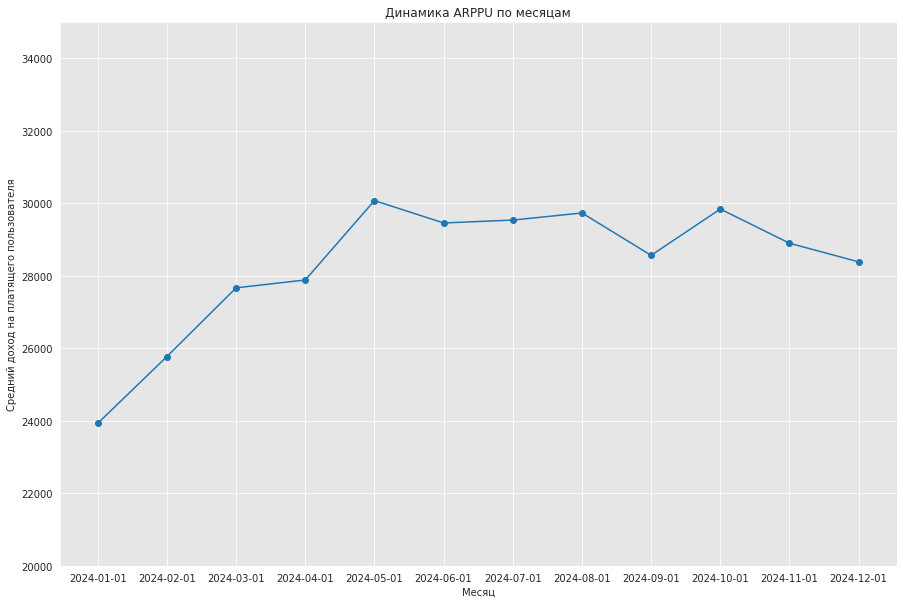

In [ ]:
arppu_data = orders.groupby(['user_id', 'order_month'])['total_price'].sum().reset_index().groupby('order_month')['total_price'].mean().reset_index(name='arppu')

plt.figure(figsize=(15, 10))

plt.plot(arppu_data['order_month'], arppu_data['arppu'], marker='o')

plt.ylim(20000, 35000)
plt.title('Динамика ARPPU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний доход на платящего пользователя')

Text(0, 0.5, 'Средний доход на пользователя')

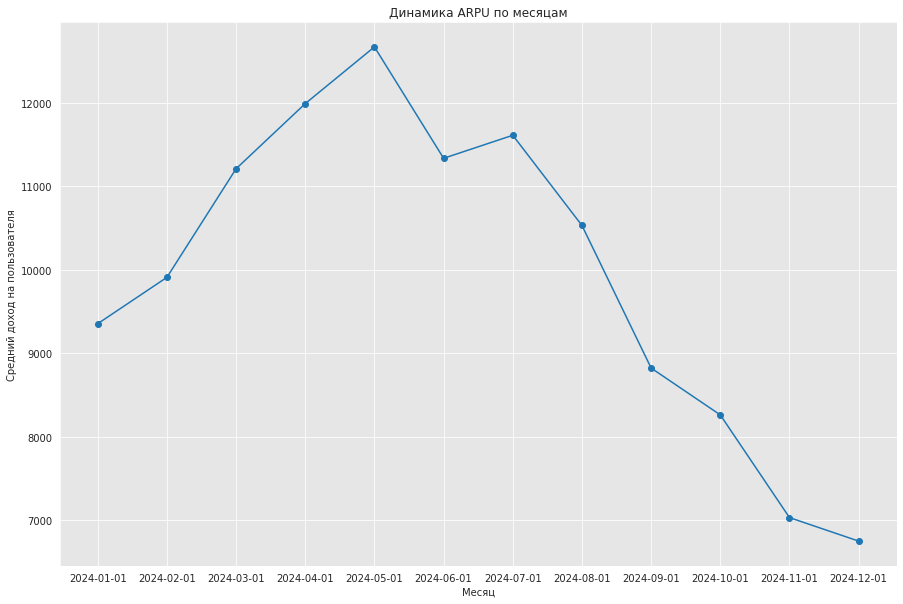

In [ ]:
monthly_users = events.groupby('event_month')['user_id'].nunique().reset_index(name='unique_users')
monthly_total_price = orders.groupby('order_month')['total_price'].sum().reset_index(name='revenue')

arpu_data = pd.merge(
    monthly_total_price,
    monthly_users,
    left_on=['order_month'],
    right_on=['event_month'],
    how='inner'
)

arpu_data['arpu'] = arpu_data['revenue'] / arpu_data['unique_users']

plt.figure(figsize=(15, 10))

plt.plot(arpu_data['order_month'], arpu_data['arpu'], marker='o')

plt.title('Динамика ARPU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний доход на пользователя')

Средний доход на пользователя показывает положительный тренд до мая 2024 года, и входит в стагнацию после. Средний доход на всех пользователей начинает резко падать с мая.

Действительно, два графика указывают на то, что выручка падает именно за счет снижения количества платящих пользователей.

In [ ]:
cohort_data = pd.merge(
    users,
    orders,
    on='user_id',
    how='left')


cohort_data['n_period'] = (pd.to_datetime(cohort_data['order_month']).dt.month - pd.to_datetime(cohort_data['cohort_month']).dt.month).fillna(0).astype('int')
cohort_data['total_price'] = cohort_data['total_price'].fillna(0)

cohort_data = cohort_data.sort_values(by=['user_id', 'order_month', 'n_period'])

cohort_size = users.groupby('cohort_month').size()

cohort_ltv = cohort_data.groupby(['cohort_month', 'n_period']).agg(
    cumulative_revenue=('total_price', 'sum')
).reset_index()

cohort_ltv['cumulative_revenue'] = cohort_ltv.groupby('cohort_month')['cumulative_revenue'].cumsum()
cohort_ltv['LTV'] = cohort_ltv['cumulative_revenue'] / cohort_ltv['cohort_month'].map(cohort_size) * 0.05

cohort_data = pd.merge(
    cohort_data,
    cohort_ltv[['cohort_month', 'n_period', 'LTV']],
    on=['cohort_month', 'n_period'],
    how='left'
)

cohort_data.head()

,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month,order_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month,n_period,LTV
0,1,2024-01-01,35,M,Москва,Google Ads,regular,2024-01-01,2024-01-01,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,172.837269
1,2,2024-01-01,53,M,Москва,Email Marketing,rare,2024-01-01,2024-01-01,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,172.837269
2,3,2024-01-01,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01,1.0,2024-01-19,Шуруповерт,2.0,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,0,172.837269
3,3,2024-01-01,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01,2.0,2024-01-19,Молоток слесарный,1.0,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,0,172.837269
4,3,2024-01-01,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01,3.0,2024-01-19,Секатор садовый,2.0,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01,0,172.837269


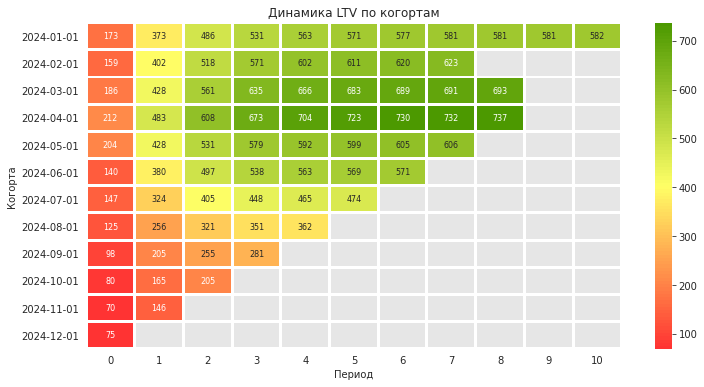

In [ ]:
df_monthly_ltv = cohort_data.groupby(['cohort_month', 'n_period'])['LTV'].mean().reset_index()

plt.rcParams['figure.figsize'] = (12, 6)

df_pivot_ltv = df_monthly_ltv.pivot(index='cohort_month', columns='n_period', values='LTV')
df_pivot_ltv[df_pivot_ltv == 0] = float('nan')

sns.heatmap(df_pivot_ltv,
           cmap=cmap,
           annot=True,
           fmt='.0f',
           linewidths=2,
           annot_kws={"size": 8})

plt.title('Динамика LTV по когортам')
plt.xlabel('Период')
plt.ylabel('Когорта')
plt.show()

У когорт, начиная с майской, LTV начинает постепенно снижаться и к июню окончательно приходит в упадок.

Оценим общую динамику затрат на маркетинг.

Text(0, 0.5, 'Бюджет')

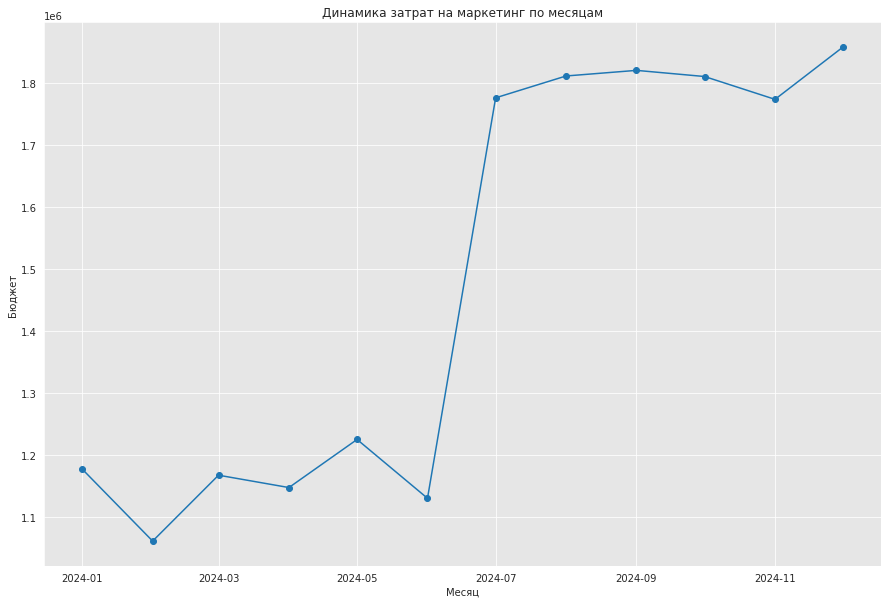

In [ ]:
monthly_costs = campaign_costs.groupby('spend_month')['budget'].sum().reset_index()

plt.figure(figsize=(15, 10))

plt.plot(monthly_costs['spend_month'], monthly_costs['budget'], marker='o')

plt.title('Динамика затрат на маркетинг по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Бюджет')

Очевидно, затраты на маркетинг коррелируют с привлечением новых пользователей, что и подтверждают графики. В июне 2024 года значительно увеличился бюджет на маркетинг и  в это же время возросло количество привлекаемых пользователей.

Text(0, 0.5, 'Цена привлечения пользователя')

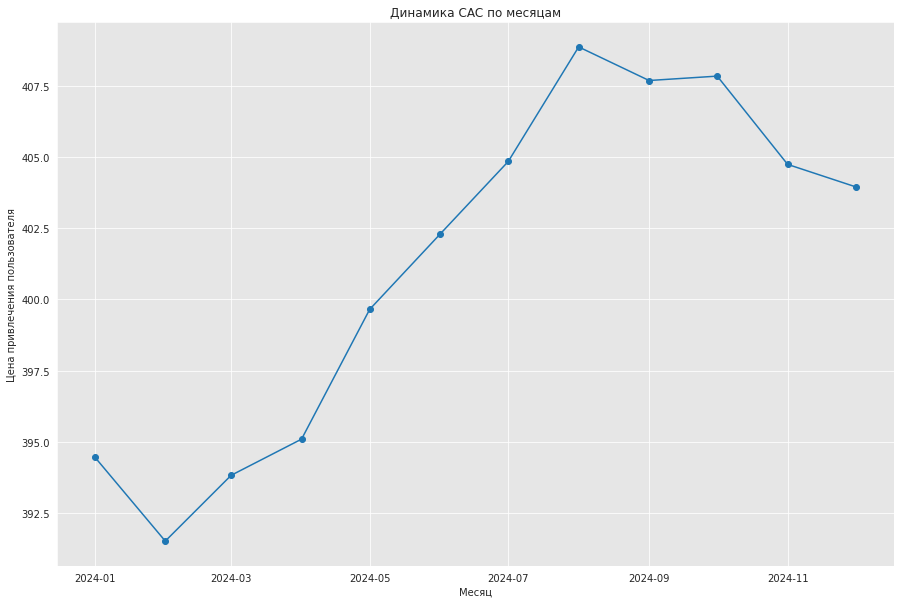

In [ ]:
monthly_reg = users.groupby(['cohort_month'])['user_id'].nunique().reset_index(name='monthly_reg')

monthly_reg['cohort_month'] = pd.to_datetime(monthly_reg['cohort_month'])
campaign_costs['spend_month'] = pd.to_datetime(campaign_costs['spend_month'])

monthly_budget = campaign_costs.groupby(['spend_month'])['budget'].sum().reset_index()

cac_data = pd.merge(
    monthly_reg,
    monthly_budget,
    left_on='cohort_month',
    right_on='spend_month',
    how='inner')

cac_data['CAC'] = cac_data['budget'] / cac_data['monthly_reg']

cac_data = cac_data.sort_values('cohort_month')

plt.figure(figsize=(15, 10))

plt.plot(cac_data['cohort_month'], cac_data['CAC'], marker='o')

plt.title('Динамика CAC по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена привлечения пользователя')

Стоимость привлечения пользователя стабильно растет с февраля по август, после чего идет на спад до конца года.

In [ ]:
cac_data['cohort_month'] = pd.to_datetime(cac_data['cohort_month'])
cohort_data['cohort_month'] = pd.to_datetime(cohort_data['cohort_month'])

cohort_data = pd.merge(
    cohort_data,
    cac_data[['cohort_month', 'CAC', 'monthly_reg']],
    on='cohort_month',
    how='left'
)

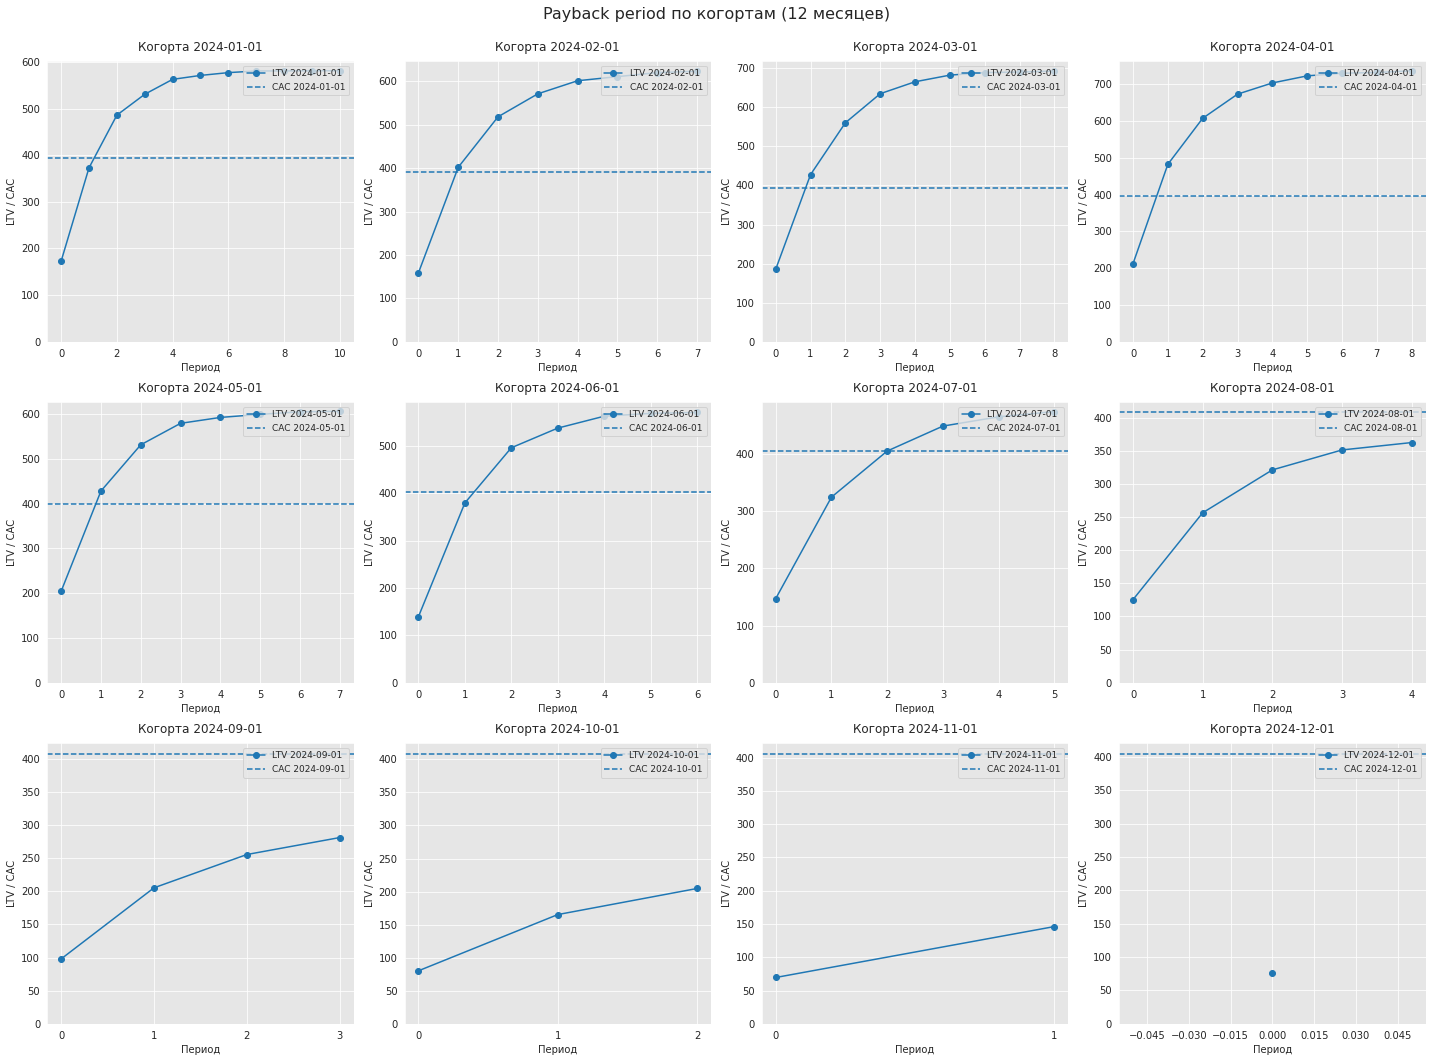

In [ ]:
cac_ltv_grouped = cohort_data.groupby(['cohort_month', 'n_period'])[['LTV', 'CAC']].mean().reset_index()
cac_ltv_grouped['cohort_month'] = cac_ltv_grouped['cohort_month'].dt.date
cac_ltv_grouped['n_period'] = cac_ltv_grouped['n_period'].astype(int)

cac_ltv_grouped = cac_ltv_grouped.sort_values(['cohort_month', 'n_period'])

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, month in enumerate(cac_ltv_grouped['cohort_month'].unique()):

  df_plot = cac_ltv_grouped[cac_ltv_grouped['cohort_month'] == month]
  df_plot = df_plot.sort_values('n_period')
  df_plot['n_period'] = df_plot['n_period'].astype(int)

  axes[i].plot(
          df_plot['n_period'],
          df_plot['LTV'],
          marker='o',
          label=f'LTV {month}'
      )

  cac_value = df_plot['CAC'].iloc[0]
  axes[i].axhline(
      cac_value,
      linestyle='--',
      label=f'CAC {month}'
  )

  axes[i].set_title(f'Когорта {month}', fontsize=12, pad=10)
  axes[i].set_xlabel('Период', fontsize=10)
  axes[i].set_ylabel('LTV / CAC', fontsize=10)
  axes[i].legend(loc='upper right', fontsize=9)
  axes[i].set_ylim(bottom=0)
  axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.suptitle('Payback period по когортам (12 месяцев)', fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Все когорты до майской включительно окупают себя уже в период 1. Все последующие когорты окупаются значительно медленнее. Когорта августа не окупила себя даже за 4 месяца. Стоимость привлечения стала нерелевантна доходу с пользователя.

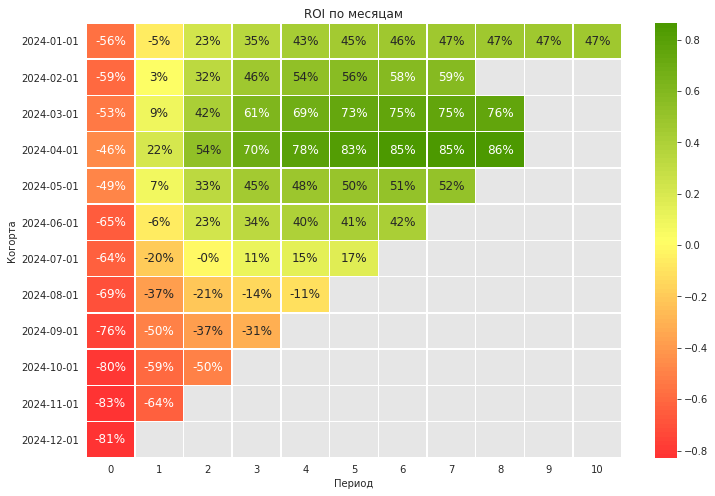

In [ ]:
df_pivot_ltv = cac_ltv_grouped.pivot(index='cohort_month', columns='n_period', values='LTV')

df_pivot_cac = cac_ltv_grouped.pivot(index='cohort_month', columns='n_period', values='CAC')

df_pivot_roi = df_pivot_roi = (df_pivot_ltv - df_pivot_cac) / df_pivot_cac

df_pivot_roi[df_pivot_roi == 0] = float('nan')

plt.figure(figsize=(12, 8))

sns.heatmap(
    df_pivot_roi,
    annot=True,
    fmt=".0%",
    linewidths=0.5,
    annot_kws={"size": 12},
    cmap=cmap
)

plt.title('ROI по месяцам')

plt.xlabel('Период')
plt.ylabel('Когорта')

plt.show()

ROI постепенно снижается начиная с когорты мая. Когорты, начиная с августовской так и не окупили себя. В долгосрочной перспективе это может негативно отразиться на продукте.

## Выводы по этапам 2 и 3


**1. Ключевая проблема: привлечение некачественного трафика с апреля-июня 2024 года**

Данные однозначно указывают на то, что в апреле-июне произошел pivotal shift (ключевое изменение) в стратегии привлечения пользователей, которое негативно сказалось на всем продукте.

*   **Апрель 2024 — точка начала проблем:** Именно в апреле начинают падать самые важные метрики качества трафика: **конверсия в покупку** и **Retention**. Это говорит о том, что проблемы начались не в июне (когда трафик вырос), а раньше. Возможно, в апреле изменилась стратегия или эффективность *существующих* каналов привлечения.
*   **Июнь 2024 — масштабирование проблемы:** В июне, пытаясь компенсировать падение, команда резко нарастила маркетинговый бюджет. Это привело к росту количества пользователей (MAU/DAU), но **качество этих пользователей было низким**. Они были менее заинтересованы в продукте, что подтверждается падением:
    *   **Stickiness** (пользователи реже заходят в приложение)
    *   **Конверсии в покупку** (новые пользователи реже становятся покупателями)
    *   **Доли платящих пользователей** (упала на 25%)

**2. Вторичные эффекты: влияние на выручку и монетизацию**

Падение качества трафика закономерно привело к проблемам с выручкой, но с важным нюансом.

*   **Выручка падает из-за снижения количества заказов, а не из-за среднего чека.** Дело не в ценообразовании или ассортименте, а в **способности привлекать и удерживать платежеспособных пользователей**.
*   **ARPU vs. ARPPU:** Тот факт, что ARPPU (доход с платящего пользователя) более стабилен, а ARPU (доход со всех пользователей) падает, является признаком **размывания базы пользователей за счет неконвертирующихся бесплатных юзеров**. Это еще раз подтверждает тезис о некачественном трафике.

**3. Показатели удержания и лояльности ухудшились**

*   **Retention и LTV:** Падение возвращаемости к покупке (Retention) в когортах после апреля — это очень тревожный сигнал. Eго **снижающийся тренд** говорит о том, что пользователи стали меньше покупать со временем и быстрее уходить. LTV начал снижаться с мая, и уже к июню окончательно приходит в упадок.

**4. Маркетинг: эффективность падает, несмотря на окупаемость**

*   **Рост CAC:** Рост стоимости привлечения пользователя (CAC) с февраля по август означает, что каналы становятся дороже и, как показала практика, менее эффективными.
*   **Падение ROI:** Это ключевой метрика для маркетинга. **Payback Period** когорт начинает увеличиваться, начиная с мая, **снижающийся тренд ROI** говорит о том, что в будущем окупаемость может исчезнуть. Маркетинг становится менее эффективной инвестицией.

**Возможные причины апрельского инцидента**:
*   **Изменение в рекламной стратегии:** Смена креативов, таргетинга или платформы на более широкую, но менее релевантную аудиторию.
*   **Внешний фактор:** Например, выход крупного конкурента, который перехватывает качественный трафик, вынуждая вас работать с менее качественным.
*   **Изменения в продукте:** Возможно, в апреле было обновление, которое ухудшило первоначальный пользовательский опыт для новых пользователей.


**Основной вывод:** Проблема маркетплейса не в монетизации или продукте как таковом, а в **неэффективной стратегии пользовательского роста**. Маркетинг привлекает большое количество неплатежеспособных или нелояльных пользователей, что размывает базу и приводит к падению выручки.

**Анализ по каналам привлечения:**
* Сравнить Revenue, CAC, конверсию в покупку, Retention и LTV для разных каналов.


## 4. Поиск инсайтов, точек роста и сегментация

После верхнеуровневой оценки данных переходим от общей картины к точечным наблюдениям. Посмотрим вглубь данных, сегментируем.

Цель — сформировать обоснованные гипотезы:

* какие сегменты работают лучше остальных
* какие сегменты работают хуже остальных
* на каких этапах воронки теряются пользователи
* какие группы можно или нужно масштабировать
* куда стоит инвестировать больше внимания или ресурсов


In [ ]:
steps = ['product_view', 'add_to_cart', 'checkout_start', 'checkout_complete']

funnel_steps = events[events['event_type'].isin(steps)]
funnel_counts =  funnel_steps.groupby('event_type')['user_id'].nunique().reindex(steps)

registred_df = pd.DataFrame({
   'step': ['registration'],
   'users': [cohort_data.groupby('cohort_month')['monthly_reg'].mean().sum()]
})

order_completed_df = pd.DataFrame({
   'step': ['order_completed'],
   'users': [orders['user_id'].nunique()]
})

events_steps_df = pd.DataFrame({
   'step': steps,
   'users': funnel_counts.values
})

funnel_df = pd.concat([registred_df, events_steps_df, order_completed_df], axis=0, ignore_index=True)

funnel_df['conversion_from_first_%'] = round(funnel_df['users'] / funnel_df['users'].iloc[0] * 100, 1)
funnel_df['dif_from_first_%'] = funnel_df['conversion_from_first_%'] - funnel_df['conversion_from_first_%'].shift(1)
funnel_df['conversion_from_previous_%'] = round(funnel_df['users'] / funnel_df['users'].shift(1) * 100, 1)
funnel_df['dif_from_previous_%'] = funnel_df['conversion_from_previous_%'] - 100
funnel_df

,step,users,conversion_from_first_%,dif_from_first_%,conversion_from_previous_%,dif_from_previous_%
0,registration,44151,100.0,NaN,NaN,NaN
1,product_view,22069,50.0,-50.0,50.0,-50.0
2,add_to_cart,20411,46.2,-3.8,92.5,-7.5
3,checkout_start,16769,38.0,-8.2,82.2,-17.8
4,checkout_complete,13897,31.5,-6.5,82.9,-17.1
5,order_completed,8855,20.1,-11.4,63.7,-36.3


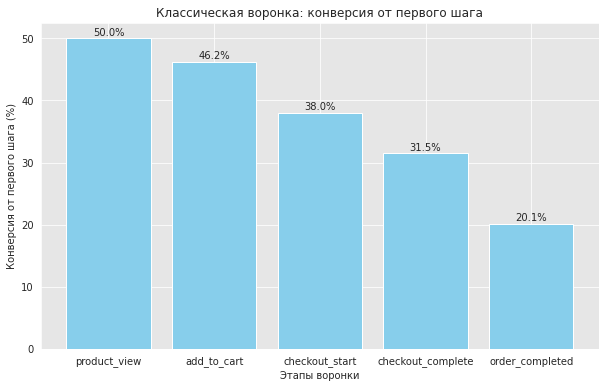

In [ ]:
plt.figure(figsize=(10, 6))

plot_data = funnel_df[funnel_df['step'] != 'registration']
plt.bar(
    plot_data['step'],
    plot_data['conversion_from_first_%'],
    color='skyblue')

for i, v in enumerate(plot_data['conversion_from_first_%']):
    plt.text(i, v + 0.5, f'{v}%', ha='center')

plt.title('Классическая воронка: конверсия от первого шага')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

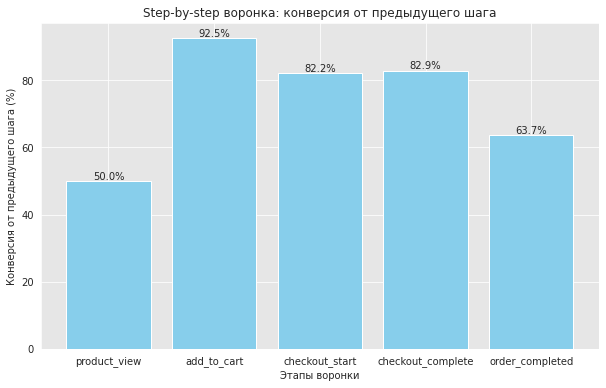

In [ ]:
plt.figure(figsize=(10, 6))

plot_data = funnel_df[funnel_df['step'] != 'registration']
plt.bar(
    plot_data['step'],
    plot_data['conversion_from_previous_%'],
    color='skyblue')

for i, v in enumerate(plot_data['conversion_from_previous_%']):
    plt.text(i, v + 0.5, f'{v}%', ha='center')

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Воронка конверсии показывает, что половина зарегистрировавшихся пользователей почти не используют приложение. Уже на шаг просмотра товаров половина юзеров не переходят. При этом все последующие этапы воронки ведут себя, как в здоровом продукте.

Это еще раз подтверждает предположение о неконвертируемом трафике, поэтому в дальнейшем сосредоточимся на сегментации по каналу привлечения.

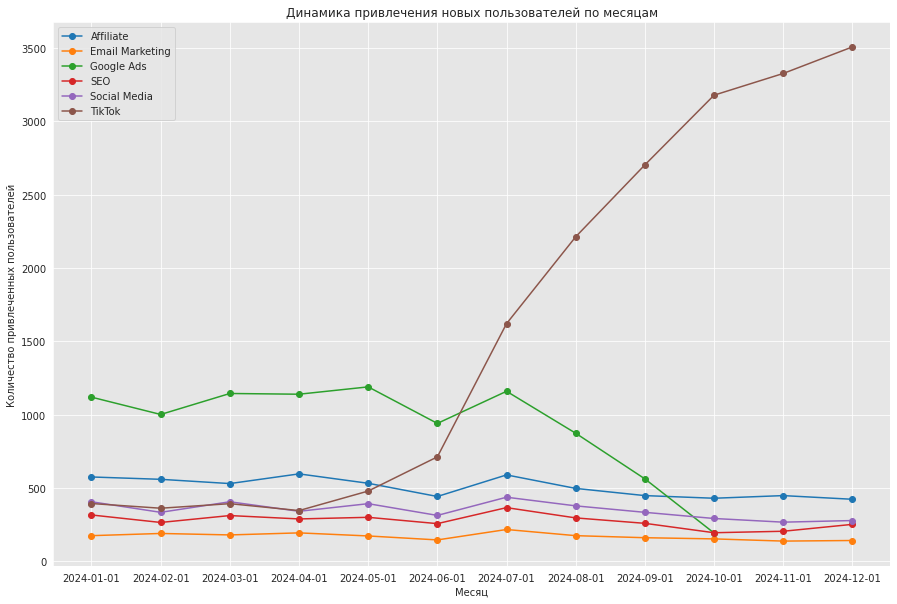

In [ ]:
monthly_reg_channel = users.groupby(['cohort_month','acq_channel'])['user_id'].nunique().reset_index()

plt.figure(figsize=(15, 10))

for channel in monthly_reg_channel.acq_channel.unique():
  plot_data = monthly_reg_channel[monthly_reg_channel['acq_channel'] == channel]
  plt.plot(plot_data['cohort_month'], plot_data['user_id'], marker='o', label=channel)

plt.title('Динамика привлечения новых пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество привлеченных пользователей')
plt.legend()

Резкий общий рост количества привлеченных пользователей целиком приходится на трафик TikTok.

Причем на общем графике было незаметно, что рост привлеченных пользователей начался еще в апреле (на общем графике всплеск приходится на июнь.

In [ ]:
retention_data_channel = pd.merge(
    users[['user_id', 'cohort_month', 'acq_channel']],
    orders[['user_id', 'order_month']],
    on='user_id',
    how='left')

retention_data_channel['n_period'] = (pd.to_datetime(retention_data_channel['order_month']).dt.month - pd.to_datetime(retention_data_channel['cohort_month']).dt.month).fillna(0).astype('int')

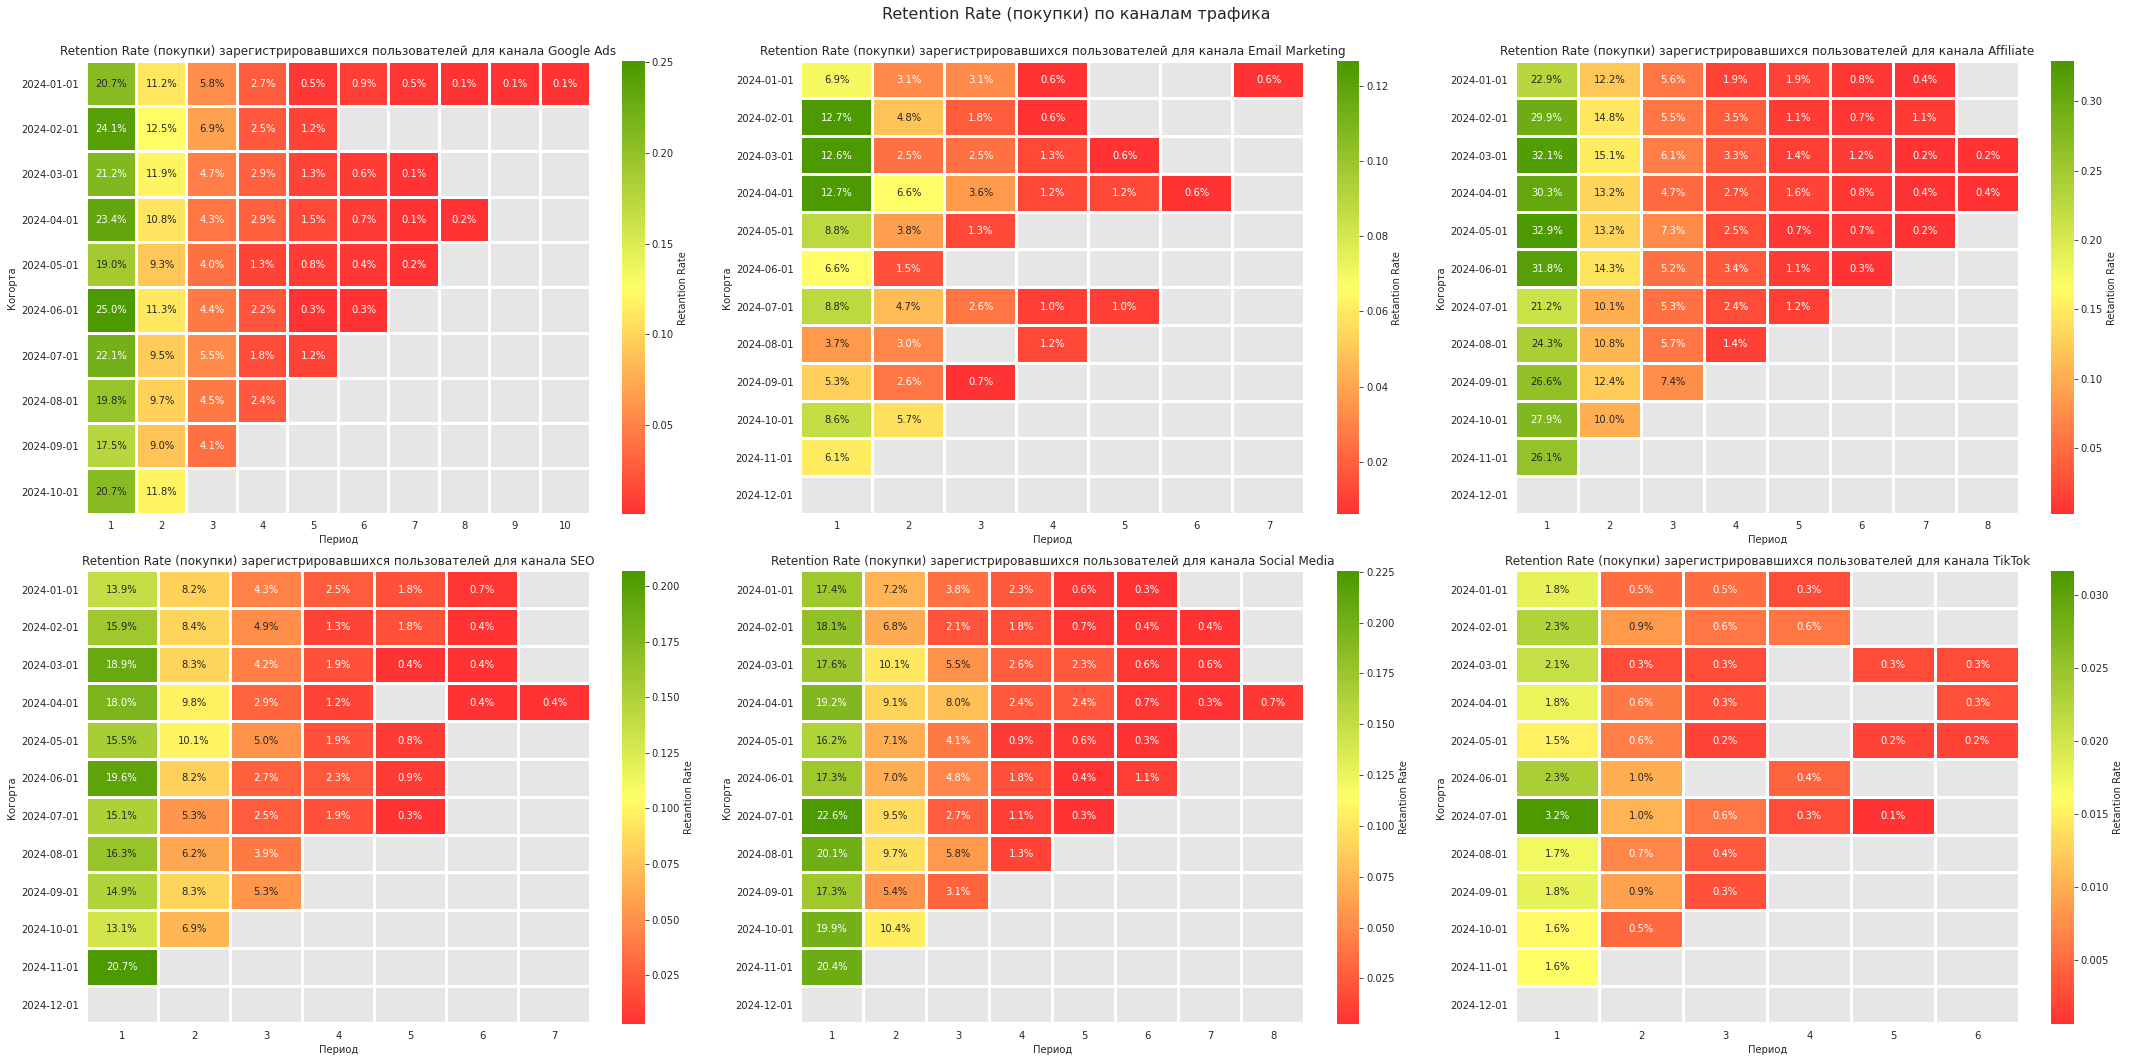

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(30, 15))
axes = axes.flatten()

for i, channel in enumerate(retention_data_channel['acq_channel'].unique()):

    pivot_data = retention_data_channel[retention_data_channel['acq_channel'] == channel]
    df_pivot = pivot_data.groupby(['cohort_month', 'n_period'])['user_id'].nunique().reset_index(
      ).pivot(index='cohort_month', columns='n_period', values='user_id')

    df_pivot_retention_channel = df_pivot.div(df_pivot[0], axis=0)
    df_pivot_retention_channel[df_pivot_retention_channel == 0] = float('nan')

    # Убираем период 0, так как он всегда равен 100
    df_pivot_retention_channel = df_pivot_retention_channel.drop(columns=[0])

    sns.heatmap(df_pivot_retention_channel,
              ax=axes[i],
              cmap=cmap,
              annot=True,
              fmt='.1%',
              linewidths=2,
              cbar_kws={'label' : 'Retantion Rate'})

    axes[i].set_title(f'Retention Rate (покупки) зарегистрировавшихся пользователей для канала {channel}')
    axes[i].set_xlabel('Период')
    axes[i].set_ylabel('Когорта')

plt.suptitle('Retention Rate (покупки) по каналам трафика', fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

В каналах Email и TikTok удержание рекордно низкое на протяжение всего рассматриваемого периода.

Остальные каналы показывают стабильный retention, хотя и не слишком высокие. Самые позитивные результаты показывает канал affilate.

Оценим конверсию из регистрации в покупку по каналам.

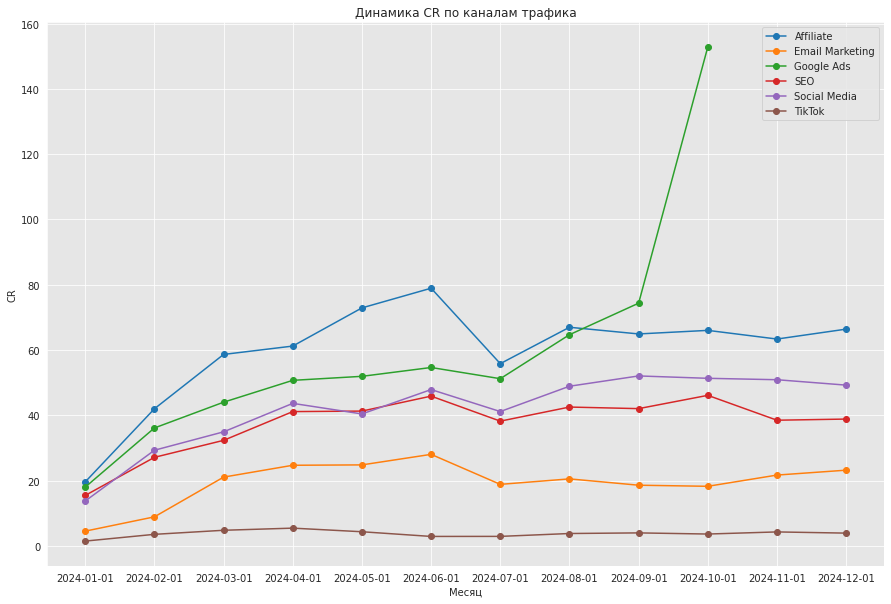

In [ ]:
monthly_registrations_channel = users.groupby(['cohort_month', 'acq_channel'])['user_id'].nunique().reset_index(name = 'registered_users')

monthly_orders_channel = retention_data_channel.groupby(['order_month', 'acq_channel'])['user_id'].nunique().reset_index(name = 'total_orders')

conversion_channel_df = pd.merge(monthly_registrations_channel,
                            monthly_orders_channel,
                            left_on=['cohort_month', 'acq_channel'],
                            right_on=['order_month', 'acq_channel'],
                            how='inner')

conversion_channel_df['conversion_rate'] = (conversion_channel_df['total_orders'] / conversion_channel_df['registered_users']) * 100

conversion_channel_df = conversion_channel_df.fillna(0)

plt.figure(figsize=(15, 10))
for channel in conversion_channel_df['acq_channel'].unique():
    plot_data = conversion_channel_df[conversion_channel_df['acq_channel'] == channel]
    plt.plot(plot_data['cohort_month'], plot_data['conversion_rate'], marker='o', label=channel)

    plt.title('Динамика CR по каналам трафика')
    plt.xlabel('Месяц')
    plt.ylabel('CR')
    plt.legend()

В среднем наилучшие результаты по конверсии показывает канал affilate, что соответствует показателям retention для этого канала. Однако, начиная с апреля начал активно наращивать конверсию канал google ads и уже в сентябре обогнал канал affilate по доле платящих пользователей. При этом для google ads количество привлекаемых пользователей начало падать с июня (как раз тогда же, когда произошел скачок регистраци по каналу TikTok). Возможно, команда урезала бюджет google ads в пользу TikTok и Email. Каманде в дальнейшем стоит уделить больше внимания успешным каналам - affilate, google ads.

Канал TikTok показывает конверсию, близкую к нулю, на протяжение всего периода наблюдений. Так же канал email показывает довольно низкие значения конверсии.

Остальные каналы показывают средние значения.

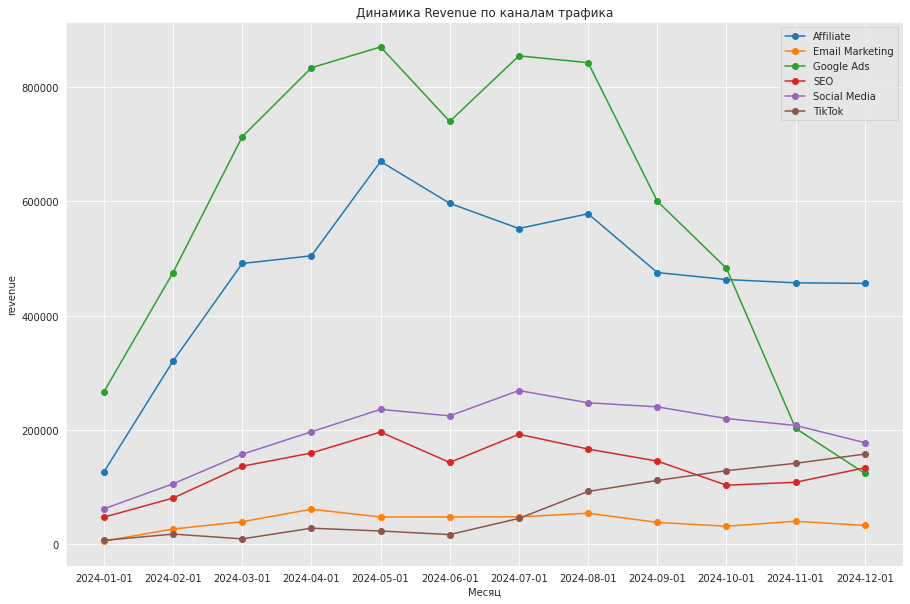

In [ ]:
orders_channel = pd.merge(orders, users[['user_id', 'acq_channel']], on='user_id', how='left')

monthly_revenue_channel = orders_channel.groupby(['order_month', 'acq_channel'])['total_price'].sum().reset_index(name='revenue')
monthly_revenue_channel['revenue'] = monthly_revenue_channel['revenue'] * 0.05

plt.figure(figsize=(15, 10))

for channel in monthly_revenue_channel.acq_channel.unique():
    plot_data = monthly_revenue_channel[monthly_revenue_channel['acq_channel'] == channel]
    plt.plot(plot_data['order_month'], plot_data['revenue'], marker='o', label=channel)

plt.title('Динамика Revenue по каналам трафика')
plt.xlabel('Месяц')
plt.ylabel('revenue')
plt.legend()

Так же, как и по предыдущим метрикам, лидерами по revenue являются affilate и google ads, однако google ads начинают резкое падение с сентября и роняет значения до уровня каналов антитопа, что вероятно связано с уменьшением количества привлеченных пользователей. Худшие результаты показывают TikTok и Email. SEO и Social media показываю не слишком высокие результаты, однако значительно выше, чем у TikTok и Email.

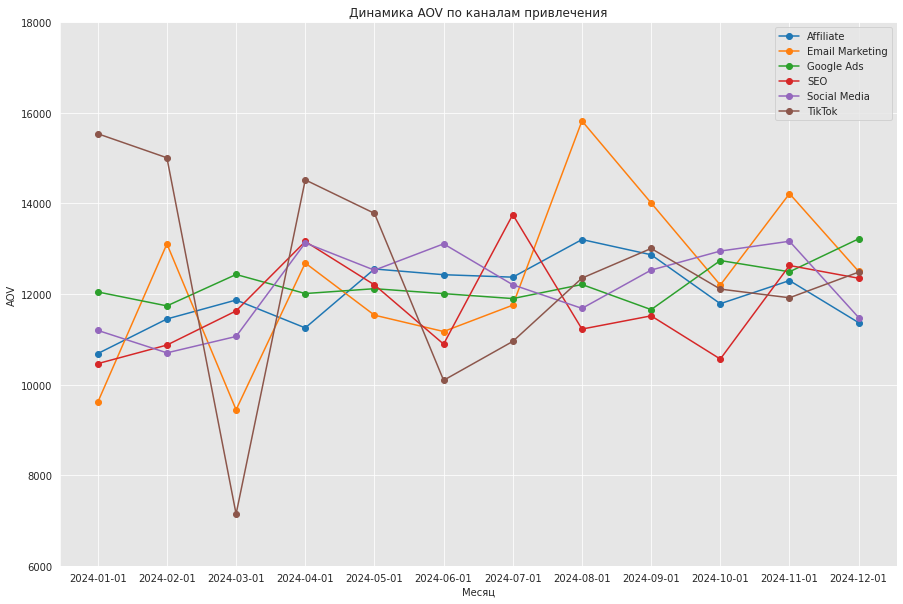

In [ ]:
monthly_aov_channel = orders_channel.groupby(['order_month', 'acq_channel'])['total_price'].mean().reset_index(name='aov')

plt.figure(figsize=(15, 10))

for channel in monthly_aov_channel.acq_channel.unique():
    plot_data = monthly_aov_channel[monthly_aov_channel['acq_channel'] == channel]
    plt.plot(plot_data['order_month'], plot_data['aov'], marker='o', label=channel)

plt.ylim(6000, 18000)
plt.title('Динамика AOV по каналам привлечения')
plt.xlabel('Месяц')
plt.ylabel('AOV')
plt.legend()

Более успешные каналы (affilate, google ads) показывают более стабильную динамику AOV - средний чек не слишком колеблется и и даже медленно растет.

Остальные каналы демонстрируют колебания, причем чем менее прибыльный канал, тем сильнее колебания. По каналу TikTok разброс среднего чека в месяц достигает 8000 (более 15к в январе, 7к в марте, 14к в апреле, 10к в июне.

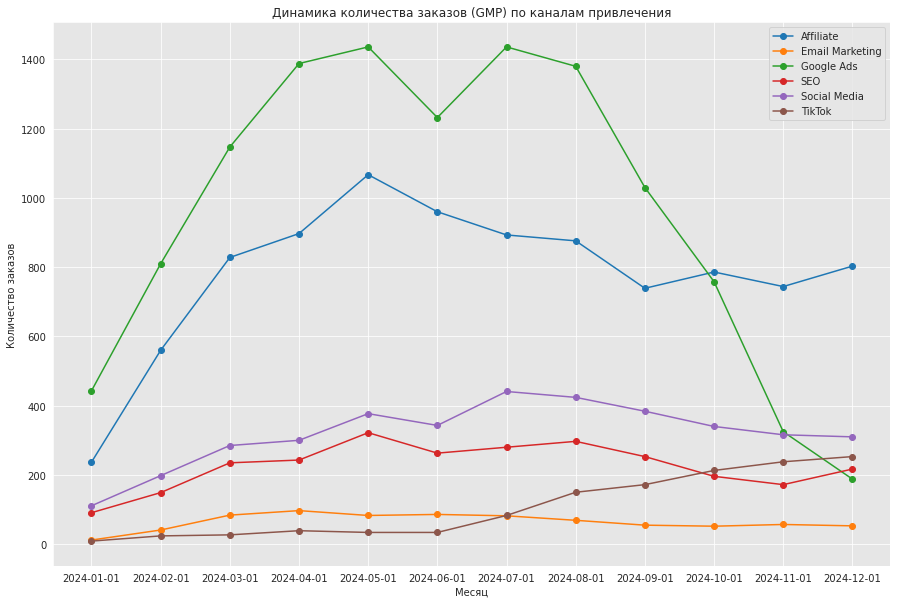

In [ ]:
monthly_order_channel = orders_channel.groupby(['order_month', 'acq_channel'])['order_id'].nunique().reset_index(name='order_count')

plt.figure(figsize=(15, 10))

for channel in monthly_order_channel.acq_channel.unique():
    plot_data = monthly_order_channel[monthly_order_channel['acq_channel'] == channel]
    plt.plot(plot_data['order_month'], plot_data['order_count'], marker='o', label=channel)

plt.title('Динамика количества заказов (GMP) по каналам привлечения')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend()

На графике динамики количества заказов видим тренд, идентичный динамике выручки. Падение общей доходности маркетплейса можно связать с у меньшением количества привлекаемых пользователей и последующим уменьшение количества заказов с самого эффективного, судя по другим метрикам, канала с одним из самых качественных трафиков - google ads.

Канал affilate показывает лучшие результаты по AOV.

Наблюдается слабый рост среднего чека по каналу TikTok, однако в связи с тем, что заказов по этому каналу мало, а конверсия стремится к нулю при рекордно высоком бюджете, маловероятно, что данный канал себя окупает.

Оценим средний доход на платящих пользователей и на всех пользователей.

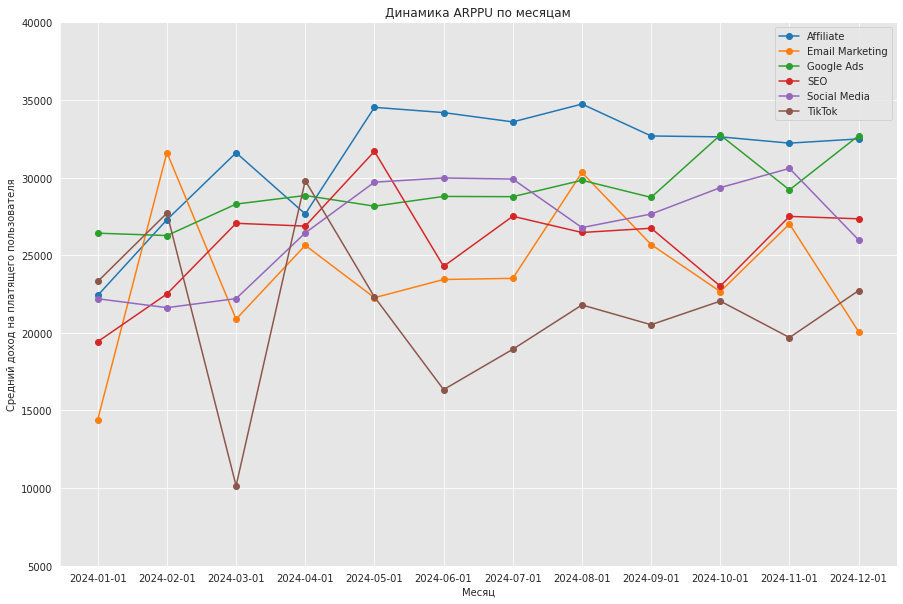

In [ ]:
arppu_data_channel = orders_channel.groupby(['user_id', 'order_month', 'acq_channel'])['total_price'].sum().reset_index().groupby(['order_month', 'acq_channel'])['total_price'].mean().reset_index(name='arppu')

plt.figure(figsize=(15, 10))

for channel in arppu_data_channel.acq_channel.unique():
    plot_data = arppu_data_channel[arppu_data_channel['acq_channel'] == channel]
    plt.plot(plot_data['order_month'], plot_data['arppu'], marker='o', label=channel)

plt.ylim(5000, 40000)
plt.title('Динамика ARPPU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний доход на платящего пользователя')
plt.legend()

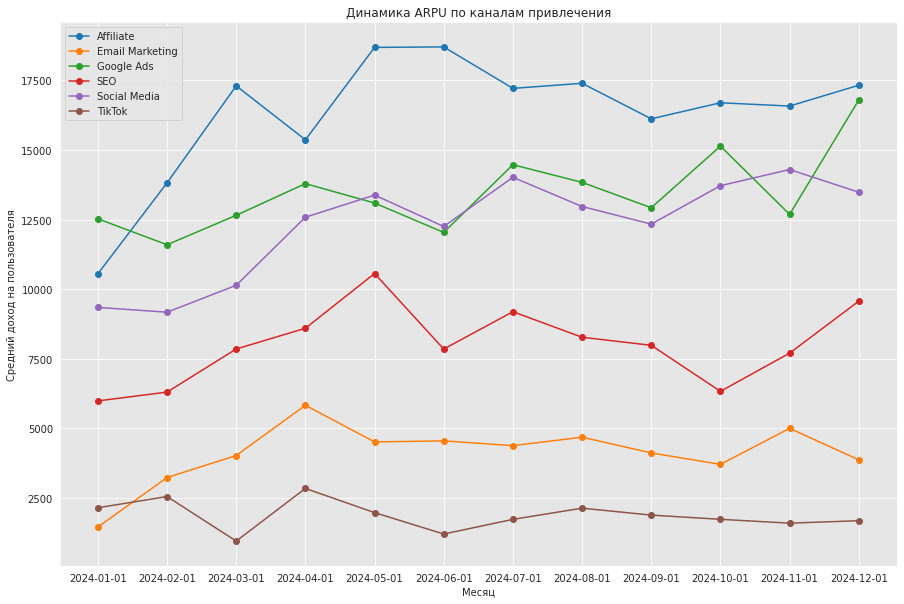

In [ ]:
events_channel = pd.merge(events, users[['user_id', 'acq_channel']], on='user_id', how='left')
monthly_users_channel = events_channel.groupby(['event_month', 'acq_channel'])['user_id'].nunique().reset_index(name='unique_users')
monthly_total_price_channel = orders_channel.groupby(['order_month', 'acq_channel'])['total_price'].sum().reset_index(name='revenue')

arpu_data_channel = pd.merge(
    monthly_total_price_channel,
    monthly_users_channel,
    left_on=['order_month', 'acq_channel'],
    right_on=['event_month', 'acq_channel'],
    how='inner'
)

arpu_data_channel['arpu'] = arpu_data_channel['revenue'] / arpu_data_channel['unique_users']

plt.figure(figsize=(15, 10))

for channel in arpu_data_channel.acq_channel.unique():
    plot_data = arpu_data_channel[arpu_data_channel['acq_channel'] == channel]
    plt.plot(plot_data['order_month'], plot_data['arpu'], marker='o', label=channel)

plt.title('Динамика ARPU по каналам привлечения')
plt.xlabel('Месяц')
plt.ylabel('Средний доход на пользователя')
plt.legend()

До апреля 2024 года все каналы привлечения показывали рост, в дальнейшем affilate, google ads и social media сохранили положительный тренд и показывали самые высокие значения среднего чека на всех пользователей, а остальные каналы начали снижать ARPU.

При этом ARPPU у каналов не падает, хотя и показывает колебания у каналов антитопа.

В комбинации это говорит о том, что выручка снижается за счет низкой конверсии у TikTok и Email, а так же снижением количества заказов у самого платежеспособного и конвертируемого трафика google ads.

In [ ]:
cohort_size_channel = users.groupby(['cohort_month', 'acq_channel']).size().reset_index(name='cohort_size')
cohort_size_channel['cohort_month'] = pd.to_datetime(cohort_size_channel['cohort_month'])

cohort_ltv_channel = cohort_data.groupby(['cohort_month', 'n_period', 'acq_channel']).agg(cumulative_revenue=('total_price', 'sum')).reset_index()

cohort_ltv_channel['cumulative_revenue'] = cohort_ltv_channel.groupby(['cohort_month', 'acq_channel'])['cumulative_revenue'].cumsum()

cohort_ltv_channel = pd.merge(
    cohort_ltv_channel,
    cohort_size_channel,
    on=['cohort_month', 'acq_channel'],
    how='left'
)

cohort_ltv_channel['LTV_channel'] = cohort_ltv_channel['cumulative_revenue'] / cohort_ltv_channel['cohort_size'] * 0.05

cohort_data = pd.merge(
    cohort_data,
    cohort_ltv_channel[['cohort_month', 'n_period', 'acq_channel', 'LTV_channel']],
    on=['cohort_month', 'n_period', 'acq_channel'],
    how='left'
)


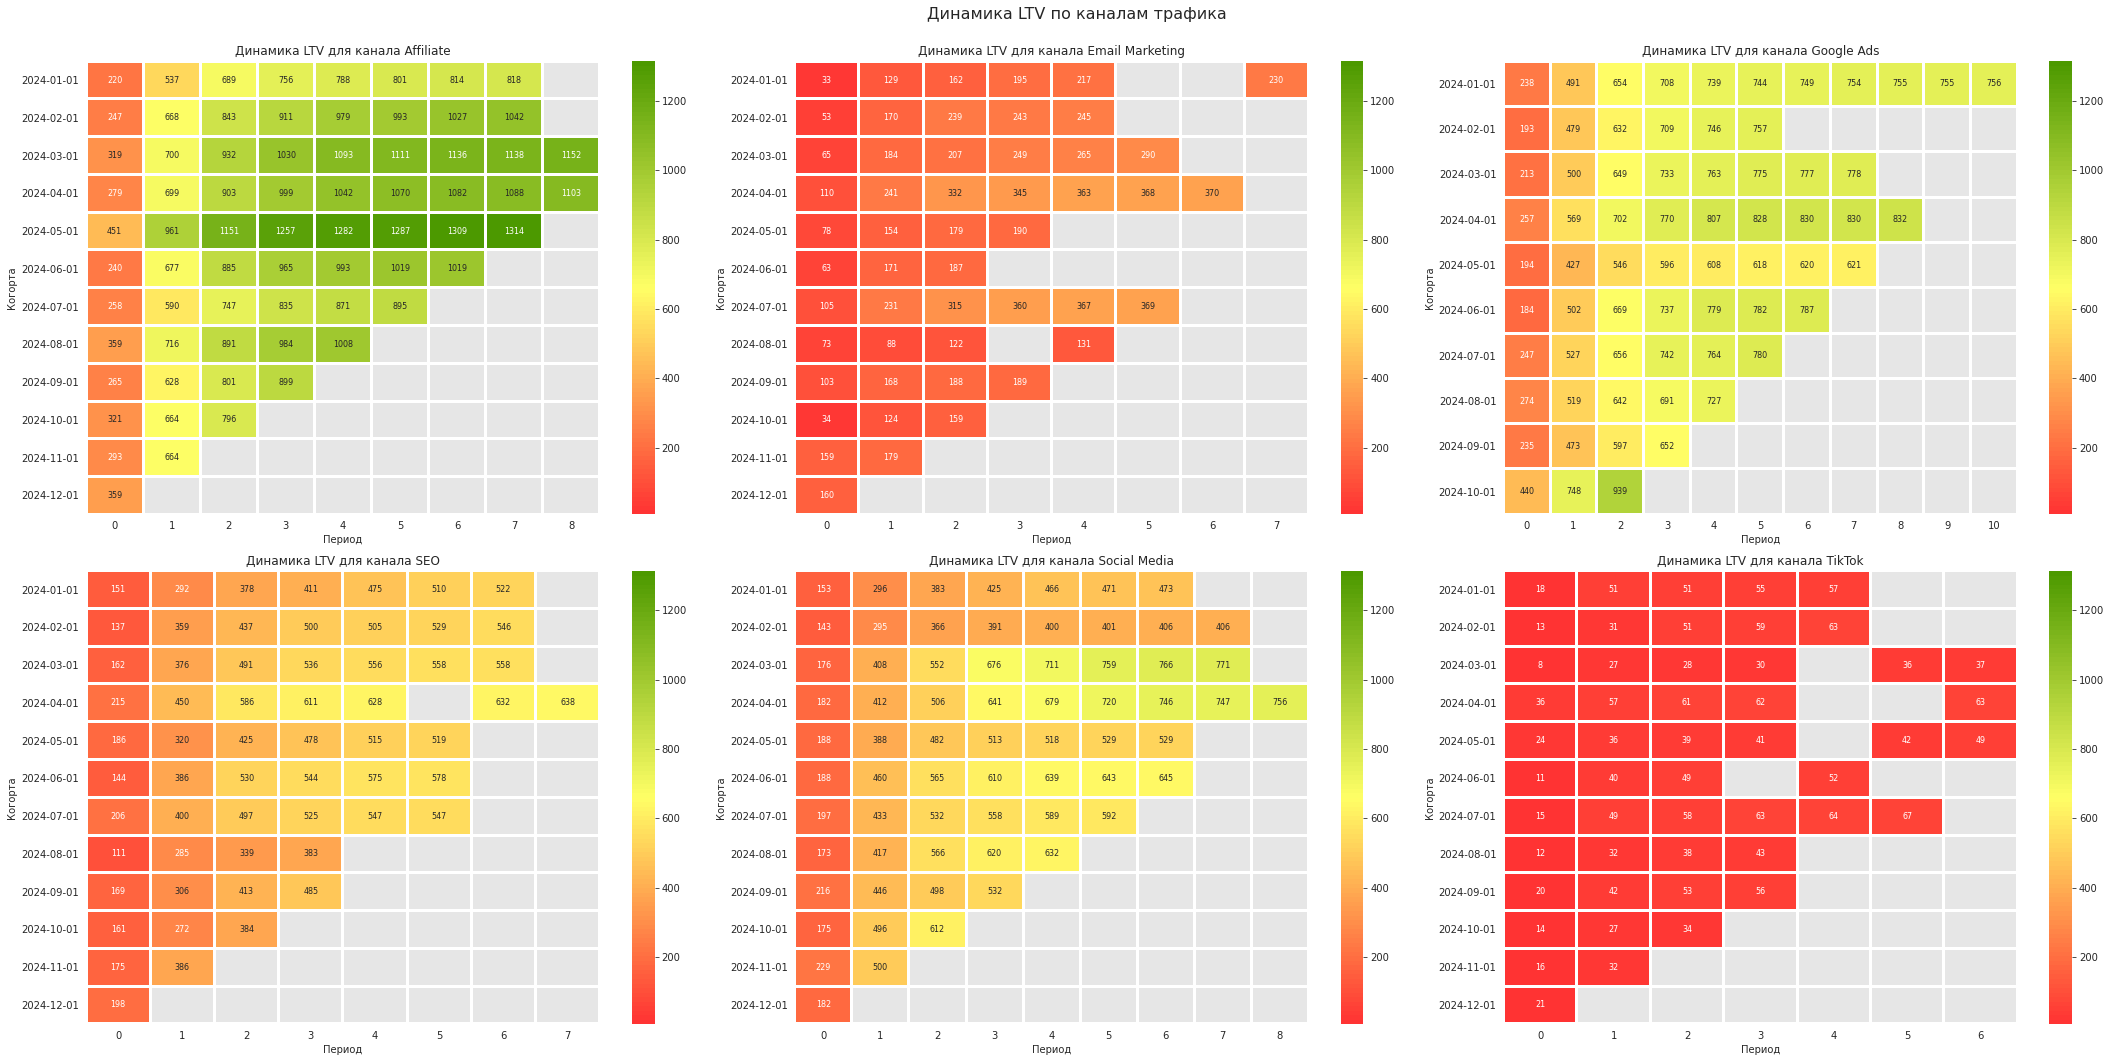

In [ ]:
df_monthly_ltv_channel = cohort_ltv_channel[['cohort_month', 'n_period', 'acq_channel', 'LTV_channel']].copy()

fig, axes = plt.subplots(2, 3, figsize=(30, 15))
axes = axes.flatten()

vmin = df_monthly_ltv_channel['LTV_channel'].min()
vmax = df_monthly_ltv_channel['LTV_channel'].max()

for i, channel in enumerate(df_monthly_ltv_channel['acq_channel'].unique()):

    pivot_data = df_monthly_ltv_channel[df_monthly_ltv_channel['acq_channel'] == channel].copy()
    pivot_data['cohort_month'] = pivot_data['cohort_month'].dt.date
    df_pivot_ltv = pivot_data.pivot(index='cohort_month', columns='n_period', values='LTV_channel')
    df_pivot_ltv[df_pivot_ltv == 0] = float('nan')

    sns.heatmap(df_pivot_ltv,
              ax=axes[i],
              cmap=cmap,
              vmin=vmin,
              vmax=vmax,
              annot=True,
              fmt='.0f',
              linewidths=2,
              annot_kws={"size": 8})



    axes[i].set_title(f'Динамика LTV для канала {channel}')
    axes[i].set_xlabel('Период')
    axes[i].set_ylabel('Когорта')

plt.suptitle('Динамика LTV по каналам трафика', fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Ожидаемо, у юзеров с каналов TikTok и Email худшие показатели LTV, причем значения **десятикратно** меньше, чем у более эффективных каналов.

Самые высокие значения LTV показывает канал affilate. Google ads и Social media так же демонстрируют позитивные результаты, SEO - результаты средние, но метрика ведет себя стабильно.

Оценим динамику затрат на маркетинг.

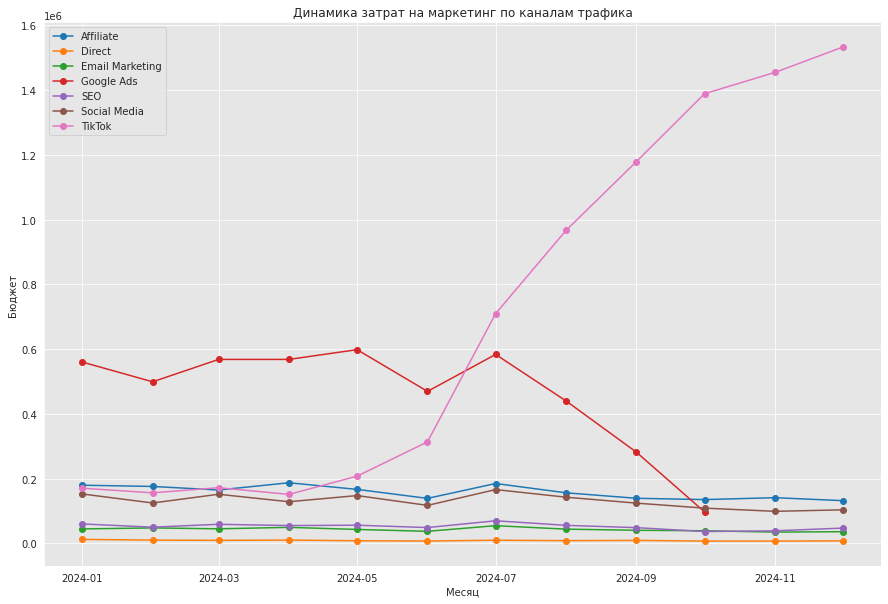

In [ ]:
monthly_costs_channel = campaign_costs.groupby(['spend_month', 'acq_channel'])['budget'].sum().reset_index()

plt.figure(figsize=(15, 10))

for channel in monthly_costs_channel.acq_channel.unique():
    plot_data = monthly_costs_channel[monthly_costs_channel['acq_channel'] == channel]
    plt.plot(plot_data['spend_month'], plot_data['budget'], marker='o', label=channel)

plt.title('Динамика затрат на маркетинг по каналам трафика')
plt.xlabel('Месяц')
plt.ylabel('Бюджет')
plt.legend()

Предположение подтвердилось: динамика затрат на маркетинг по когортам показывает, что что бюджет канала google ads значительно снизили в пользу канала TikTok, а в ноябре и вовсе прекратили финансирование.

Так же интересно отметить, что при высокой эффективности канала affilate есго стоимость остается относительно низкой. Вероятно, при дальнейшем анализе это канал покажет сравнительно лучшие показатели окупаемости.

In [ ]:
monthly_reg_channel = users.groupby(['cohort_month', 'acq_channel'])['user_id'].nunique().reset_index(name='monthly_users_channel')

monthly_reg_channel['cohort_month'] = pd.to_datetime(monthly_reg_channel['cohort_month'])
campaign_costs['spend_month'] = pd.to_datetime(campaign_costs['spend_month'])

cohort_data = pd.merge(
    cohort_data,
    monthly_reg_channel,
    on=['cohort_month', 'acq_channel'],
    how='left'
)

cohort_data = pd.merge(
    cohort_data,
    campaign_costs,
    left_on=['cohort_month', 'acq_channel'],
    right_on=['spend_month', 'acq_channel'],
    how='left'
)

cohort_data['CAC_channel'] = cohort_data['budget'] / cohort_data['monthly_users_channel']

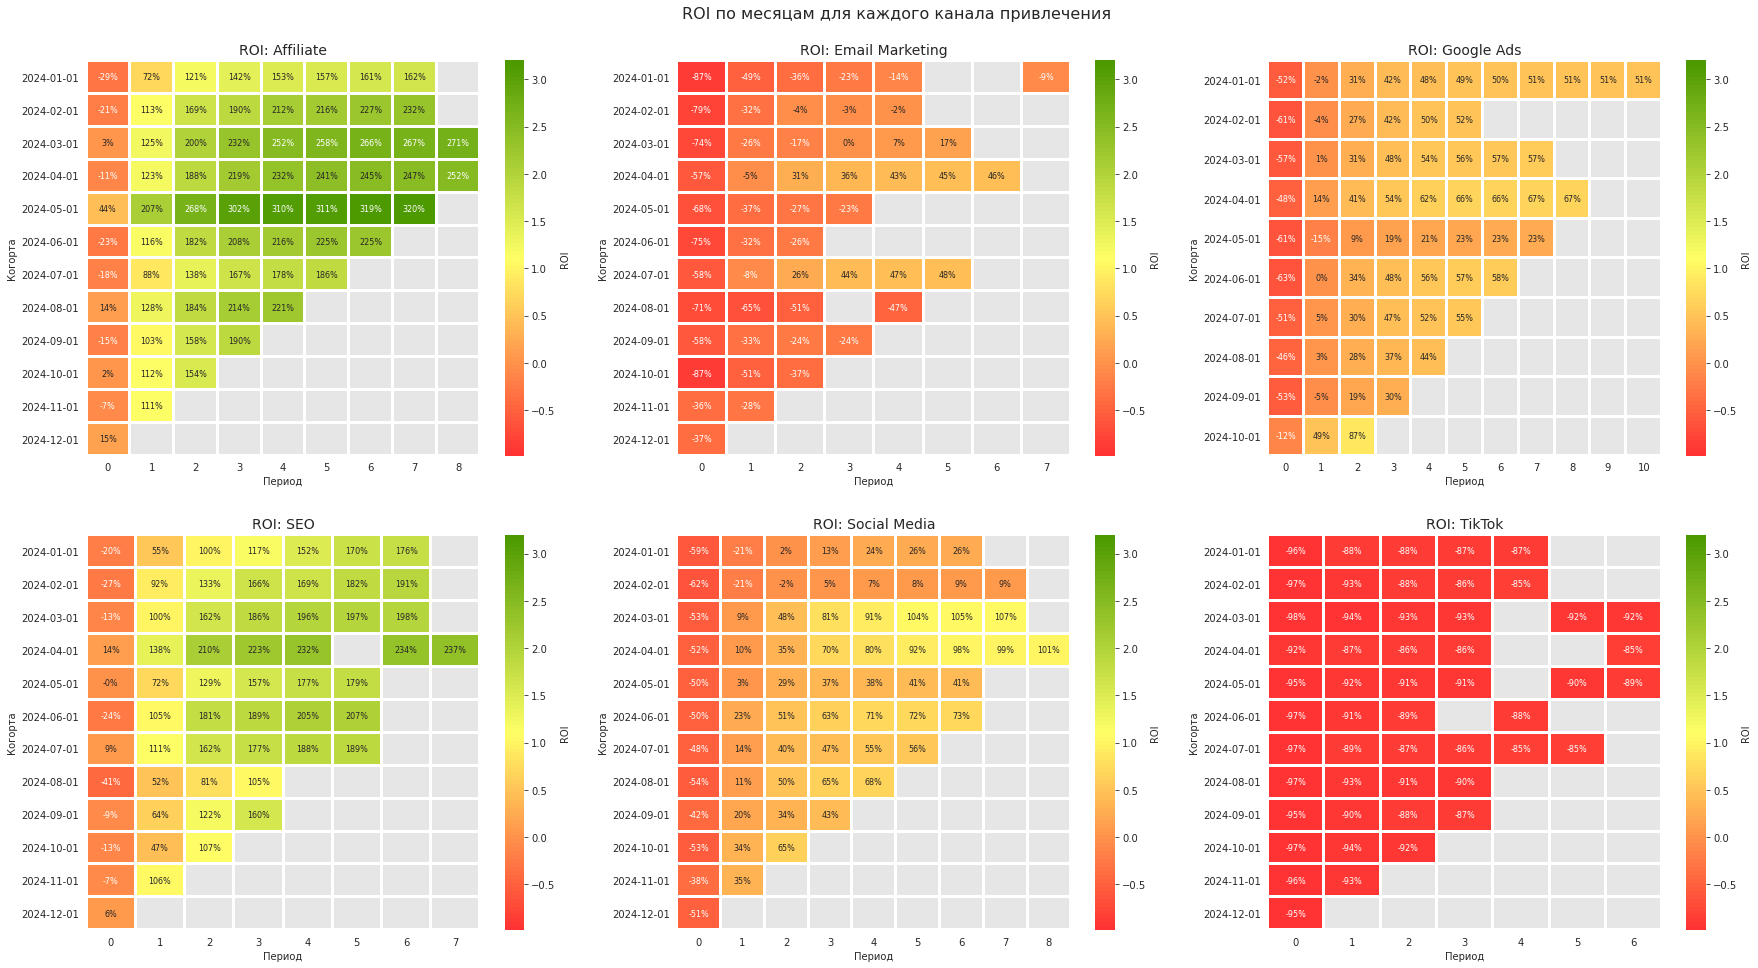

In [ ]:
cac_ltv_grouped_channel = cohort_data.groupby(['cohort_month', 'n_period', 'acq_channel'])[['LTV_channel', 'CAC_channel']].mean().reset_index()

cac_ltv_grouped_channel['ROI'] = (cac_ltv_grouped_channel['LTV_channel'] - cac_ltv_grouped_channel['CAC_channel']) / cac_ltv_grouped_channel['CAC_channel']

fig, axes = plt.subplots(2, 3, figsize=(30, 15))
axes = axes.flatten()

vmin = cac_ltv_grouped_channel['ROI'].min()
vmax = cac_ltv_grouped_channel['ROI'].max()

for i, channel in enumerate(cac_ltv_grouped_channel['acq_channel'].unique()):

    channel_data = cac_ltv_grouped_channel[cac_ltv_grouped_channel['acq_channel'] == channel].copy()
    channel_data['cohort_month'] = channel_data['cohort_month'].dt.date
    pivot_roi = channel_data.pivot_table(
        index='cohort_month',
        columns='n_period',
        values='ROI'
    )

    pivot_roi[pivot_roi == 0] = float('nan')

    sns.heatmap(
        pivot_roi,
        ax=axes[i],
        annot=True,
        fmt=".0%",
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        linewidths=2,
        annot_kws={"size": 8},
        cbar_kws={'label': 'ROI'}
    )

    axes[i].set_title(f'ROI: {channel}', fontsize=14)
    axes[i].set_xlabel('Период')
    axes[i].set_ylabel('Когорта')


plt.suptitle('ROI по месяцам для каждого канала привлечения', fontsize=16, y=0.98)
plt.subplots_adjust(top=0.93)
plt.show()

Каналы TikTok и Email не окупаются ни в одной когорте и являются убыточными. Именно некачественный трафик с данных каналов (особенно TikTok) негативно повлиял на основные метрики продукта.

Лучшие результаты по окупаемости показывают каналы affilate и SEO. Для affilate результаты ожидаемые, все метрики по этому каналу показывали отличные результаты, а SEO в свою очередь показывает средние результаты по всем метрикам и хороший ROI из-за низкой цены трафика.

Канал google ads, хотя и показывал отличные результаты по всем метрикам и казался высокоэффективным, показал средний ROI, как и Social media, эффективность этого трафика не смогла окупить его стоимость. Возможно, именно это стало причиной того, что с ноября 2024 года продукт перестал финансировать этот канал, как видно из графиков выше.


## Выводы по этапу 4

### Аналитическая записка: Поиск инсайтов и точек роста

**1. Ключевой инсайт: Источник проблем идентифицирован**
Основная гипотеза из первой части анализа подтвердилась. Падение общих метрик продукта (выручка, конверсия, retention) напрямую связано с **перераспределением маркетингового бюджета в пользу неэффективных каналов привлечения (TikTok и Email) в ущерб эффективным (Google Ads и Affiliate)**. Это классический случай «погони за объемом в ущерб качеству».

**2. Сегментация каналов по эффективности**

| Канал | Конверсия | Retention | LTV | ROI | Вывод |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Affiliate** | Высокая | Высокое | **Лидер** | **Лидер** | **Золотой фонд.** Низкая стоимость, высокие и стабильные показатели. Главная точка роста. |
| **Google Ads** | Высокая (растет) | Высокое | Высокий | Средний | **Качество есть, цена есть.** Дорогой, но эффективный канал. Требует оптимизации для повышения ROI. |
| **SEO** | Средняя | Стабильное | Средний | **Высокий** | **Надежный сегмент.** Низкая стоимость привлечения обеспечивает хорошую окупаемость. |
| **Social Media** | Средняя | Стабильное | Выше среднего | Средний | **Стабильный сегмент.** Показывает потенциал для роста. |
| **Email** | Низкая | Низкое | Низкий | **Убыточный** | **Проблемный сегмент.** Низкая эффективность. |
| **TikTok** | **~0%** | **Низкое** | **Низкий** | **Убыточный** | **Главная проблема.** Массовый приток неплатежеспособного трафика с апреля-июня 2024 года разрушил общие метрики. |

**3. Анализ воронки и точек роста**
*   **Главная точка потерь:** Первый шаг воронки (`registration` -> `product_view`). **50% пользователей** не проявляют никакой активности после регистрации. Это прямое следствие привлечения нерелевантной аудитории с TikTok и Email.
*   **Здоровая часть воронки:** Конверсия между шагами `product_view`, `add_to_cart`, `checkout` находится на хорошем уровне (82-92%). Это говорит о том, что **для "горячей" аудитории продукт и процесс покупки удобны**. Проблема не в продукте, а в трафике.

**4. Формулировка гипотез для развития продукта**

**Гипотеза 1: Перенаправление бюджета с TikTok на Affiliate-каналы**
*   **Предложение:** Если перенести основной маркетинговый бюджет с убыточного канала TikTok на канал Affiliate, то общая выручка и ROI вырастут за счет притока качественных пользователей с высоким LTV.
*   **Обоснование:** На основе анализа: Affiliate показывает рекордные LTV и ROI при низкой стоимости привлечения, в то время как TikTok — убыточен и имеет near-zero конверсию.

**Гипотеза 2: Оптимизация кампаний в Google Ads для повышения ROI**
*   **Предложение:** Если провести A/B тестирование креативов и таргетинга в Google Ads, чтобы снизить CAC и/или повысить конверсию, то можно увеличить ROI канала до уровня, сопоставимого с Affiliate, сохраняя объемы качественного трафика.
*   **Обоснование:** Google Ads показывает высокие показатели конверсии и LTV, но средний ROI из-за высокой стоимости. Это точка для оптимизации, а не для отказа.

**Гипотеза 3: Внедрение онбординга для "холодных" пользователей**
*   **Предложение:** Если для пользователей из каналов с низкой конверсией (TikTok, Email) внедрить усиленный онбординг (e.g., приветственные скидки, подборки популярных товаров), то можно повысить конверсию на первом шаге воронки (`product_view`).
*   **Обоснование:** 50% отток на первом шаге говорит о том, что пользователи не понимают ценность продукта. Гипотеза направлена на "разогрев" холодной аудитории.

**Гипотеза 4: Полное прекращение финансирования убыточных каналов**
*   **Предложение:** Если полностью остановить инвестиции в каналы TikTok и Email, то это мгновенно остановит убытки, повысит общий ROI маркетинга и улучшит общие метрики продукта (среднюю конверсию, retention).
*   **Обоснование:** Данные однозначно показывают, что эти каналы не окупаются ни в одной когорте и являются главной причиной падения метрик.

**Гипотеза 5: Перенастройка таргетинга канала TikTok**
*   **Предложение:** Если перенастроить таргетинг канала TikTok изменив предельный возраст привлекаемой аудитории (например до 50 лет), это может повысить общую вовлеченность пользователей и в конечном итоге конверсию в покупку.
*   **Обоснование:** Данные показывают равномерное распределения по возраст для данного канала привлечения, но слишком взрослые пользователи не являются целевой аудиторией продукта.

---

### Выводы для заказчика

1.  **Проблема найдена:** Падение выручки на 25% и ключевых метрик вызвано переключением бюджета на **некачественные каналы привлечения — TikTok и Email**. Эти каналы не окупаются и приносят пользователей, которые не покупают.
2.  **Точки роста:** Cильные стороны — каналы **Affiliate** и **Google Ads**.
    *   **Affiliate** — ваш самый эффективный канал (максимальные LTV и ROI). Его нужно **масштабировать**.
    *   **Google Ads** — привлекает качественных платящих пользователей, но требует оптимизации для снижения стоимости.
3.  **Рекомендуемые действия:**
    *   **Немедленно прекратить** финансирование убыточных каналов (TikTok, Email).
    *   **Перенаправить высвободившийся бюджет** на масштабирование канала Affiliate и на оптимизацию кампаний в Google Ads.
    *   **Проанализировать воронку** для пользователей из "холодных" каналов, чтобы улучшить их первое впечатление о продукте.

## 5. Подготовка эксперимента и подведение его результатов

## Новые данные:

```python
pa_diploma_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_events_AB.csv')
pa_diploma_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_orders_AB.csv')
pa_diploma_sessions_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_sessions_AB.csv')
pa_diploma_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_users_AB.csv')
```

## Результаты сплита лежат в таблице:

```python
pa_diploma_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_AB_split_users.csv')
```

* user_id – id клиента
* group – группа, в которую попал клиент

Таблицы с данными о пользователях, событиях и заказах идентичны таблицам с историческими данными.

Описание таблицы `sessions_AB`

| Поле | Описание |
|------|----------|
| `session_id` | Уникальный идентификатор сессии. |
| `user_id` | Уникальный идентификатор пользователя. |
| `session_start` | Дата и время начала сессии. |
| `os` | Операционная система устройства. |
| `device` | Тип устройства. |
| `region` | Регион пользователя. |
| `browser` | Браузер, используемый пользователем. |
| `country` | Страна пользователя. |
| `entry_path` | Путь входа (начальная страница сессии). |
| `path_start` | Путь начала отслеживания. |
| `utm_source` |  |
| `screen_size` | Разрешение экрана устройства. |
| `scroll_depth` | Глубина прокрутки. |
| `user_segment` | Сегмент пользователя (regular/premium и т.д.). |
| `utm_campaign_id` | Идентификатор рекламной кампании. |
| `session_week` | Неделя сессии. |
| `session_month` | Месяц сессии. |

# Дизайн эксперимента:

Бонус на первую покупку для пользователей TikTok

## 1. Контекст и цель эксперимента

- **Бизнес-контекст:** Команда продукта запускает эксперимент, направленный на повышение конверсии среди пользователей, привлечённых через канал TikTok. Для стимулирования первой покупки пользователям будет предоставлен бонус на первую покупку.  
- **Цель:** Проверить, влияет ли предоставление бонуса на первую покупку на конверсию и выручку среди пользователей TikTok.  
- **Гипотеза:** Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, приведет к увеличению конверсии в первую покупку

---

## 2. Формат эксперимента

- **Тип эксперимента:** Сплит-роллинг (rolling split)  
- **Канал:** Только пользователи, пришедшие с TikTok  
- **Группы:**  
  - **Контрольная (A):** пользователи TikTok без бонуса  
  - **Тестовая (B):** пользователи TikTok с бонусом на первую покупку  
- **Распределение:** Равномерное распределение новых пользователей TikTok между группами по дате регистрации  
- **Период проведения:** 3 недели (фиксировано)

---

## 3. Ключевые метрики

### Основная метрика

- **Конверсия в первую покупку** — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку  
  - *Цель:* увеличить конверсию с помощью бонуса  
  - *Критерий успеха:* статистически значимый рост конверсии в тестовой группе

### Вспомогательные метрики

- **ARPU** (средняя выручка на пользователя TikTok)  
- **ARPPU** (средняя выручка на покупателя TikTok)  
- **AOV** (средний чек TikTok)

### Барьерная метрика

- **Общая выручка от пользователей TikTok**

---

## 4. Размеры групп и запуск

- **Целевая аудитория:** только пользователи TikTok  
- **Размеры групп:** определяются по фактическому трафику TikTok за период эксперимента  
- **Комментарий:** запуск без предварительного расчёта мощности и MDE из-за срочности задачи


In [ ]:
# Загрузка дополнительных библиотек для тестирования
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

In [ ]:
orders_AB = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_diploma_orders_AB.csv',
    parse_dates=['order_date']
)

users_AB = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_diploma_users_AB.csv',
    parse_dates=['registration_date']
)

events_AB = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_diploma_events_AB.csv',
    parse_dates=['event_date']
)

split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_AB_split_users.csv')

sessions_AB = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_diploma_sessions_AB.csv',
    parse_dates=['session_start'])

In [ ]:
original_dfs = [orders_AB, sessions_AB, users_AB, events_AB]

for i, (df_name, date) in enumerate(zip(['orders_AB', 'sessions_AB', 'users_AB', 'events_AB'], ['order_date', 'session_start', 'registration_date', 'event_date'])):
  print(f'Сведения о таблице {df_name}')
  original_dfs[i] = original_dfs[i][original_dfs[i]['user_id'].isin(split_users['user_id'])]
  df.drop_duplicates()
  original_dfs[i].info()
  min_date = original_dfs[i][date].min()
  max_date = original_dfs[i][date].max()

  print(f'\nДанные представлены за период с {min_date} по {max_date}')
  display(original_dfs[i].head())
  print('\n\n')

print('Сведения о таблице split_users')
display(split_users.info())

Сведения о таблице orders_AB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 31399 to 33269
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       255 non-null    int64         
 1   user_id        255 non-null    int64         
 2   order_date     255 non-null    datetime64[ns]
 3   product_name   255 non-null    object        
 4   quantity       255 non-null    int64         
 5   unit_price     255 non-null    float64       
 6   total_price    255 non-null    float64       
 7   category_name  255 non-null    object        
 8   order_week     255 non-null    object        
 9   order_month    255 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 21.9+ KB

Данные представлены за период с 2025-01-01 11:57:43 по 2025-01-26 20:39:35


,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
31399,37141,45065,2025-01-01 11:57:43,Цепочка серебряная,3,7202.01,21606.03,Украшения и часы,2024-12-30,2025-01-01
31415,37148,45081,2025-01-01 16:01:22,Куртка детская,2,2156.91,4313.82,Детская одежда,2024-12-30,2025-01-01
31416,37149,45081,2025-01-01 16:01:22,Джинсы детские,1,873.16,873.16,Детская одежда,2024-12-30,2025-01-01
31451,37147,45077,2025-01-02 04:59:13,Корм для кошек,2,851.39,1702.78,Зоотовары,2024-12-30,2025-01-01
31452,37146,45077,2025-01-02 04:59:13,Чай черный,2,239.45,478.90,Продукты питания,2024-12-30,2025-01-01





Сведения о таблице sessions_AB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 119858 to 127402
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   session_id       812 non-null    int64         
 1   user_id          812 non-null    int64         
 2   session_start    812 non-null    datetime64[ns]
 3   os               812 non-null    object        
 4   device           812 non-null    object        
 5   region           812 non-null    object        
 6   browser          812 non-null    object        
 7   country          812 non-null    object        
 8   entry_path       812 non-null    object        
 9   path_start       812 non-null    object        
 10  utm_source       812 non-null    object        
 11  screen_size      812 non-null    object        
 12  scroll_depth     812 non-null    int64         
 13  user_segment     812 non-null    object        
 14  

,session_id,user_id,session_start,os,device,region,browser,country,entry_path,path_start,utm_source,screen_size,scroll_depth,user_segment,utm_campaign_id,session_week,session_month
119858,135457,45076,2025-01-02 03:24:57,Android,tablet,Санкт-Петербург,Edge,Россия,/category,/sale/19,unknown,1920x1080,43,regular,13.0,2024-12-30,2025-01-01
119867,135407,45046,2025-01-02 03:57:06,macOS,tablet,Москва,Firefox,Россия,/category,/click/4,unknown,768x1024,34,medium,37.0,2024-12-30,2025-01-01
120002,135595,45196,2025-01-02 14:45:32,iOS,mobile,Санкт-Петербург,Firefox,Россия,/promo,/recommend/16,unknown,1920x1080,78,medium,43.0,2024-12-30,2025-01-01
120055,135258,44985,2025-01-02 19:37:58,macOS,mobile,Другие регионы,Edge,Россия,/home,/recommend/9,unknown,1920x1080,28,rare,10.0,2024-12-30,2025-01-01
120201,135349,45023,2025-01-03 06:37:59,Android,tablet,Другие регионы,Firefox,Россия,/checkout,/recommend/20,unknown,375x667,67,medium,48.0,2024-12-30,2025-01-01





Сведения о таблице users_AB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 19228 to 22195
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2968 non-null   int64         
 1   registration_date  2968 non-null   datetime64[ns]
 2   os                 2968 non-null   object        
 3   age                2968 non-null   int64         
 4   device             2968 non-null   object        
 5   gender             2968 non-null   object        
 6   region             2968 non-null   object        
 7   browser            2968 non-null   object        
 8   country            2968 non-null   object        
 9   acq_channel        2968 non-null   object        
 10  campaign_id        2968 non-null   float64       
 11  user_segment       2968 non-null   object        
 12  buyer_segment      2968 non-null   object        
 13  cohort_week        2968 non

,user_id,registration_date,os,age,device,gender,region,browser,country,acq_channel,campaign_id,user_segment,buyer_segment,cohort_week,cohort_month
19228,44965,2025-01-01 18:10:00,iOS,66,desktop,M,Новосибирск,Safari,Россия,TikTok,14.0,новичок,one_time,2024-12-30,2025-01-01
19229,44967,2025-01-01 11:29:00,iOS,70,tablet,M,Московская область,Firefox,Россия,TikTok,13.0,новичок,rare,2024-12-30,2025-01-01
19230,44968,2025-01-01 13:05:00,Android,68,mobile,F,Нижний Новгород,Edge,Россия,TikTok,10.0,спящий,regular,2024-12-30,2025-01-01
19231,44969,2025-01-01 00:23:00,Windows,24,mobile,F,Краснодар,Chrome,Россия,TikTok,8.0,спящий,medium,2024-12-30,2025-01-01
19232,44970,2025-01-01 06:33:00,iOS,50,tablet,M,Санкт-Петербург,Chrome,Россия,TikTok,2.0,спящий,regular,2024-12-30,2025-01-01





Сведения о таблице events_AB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 787804 to 831211
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      4349 non-null   int64         
 1   session_id    4349 non-null   int64         
 2   user_id       4349 non-null   int64         
 3   event_date    4349 non-null   datetime64[ns]
 4   event_type    4349 non-null   object        
 5   os            4349 non-null   object        
 6   device        4349 non-null   object        
 7   event_index   4349 non-null   int64         
 8   user_segment  4349 non-null   object        
 9   product_name  2335 non-null   object        
 10  event_week    4349 non-null   object        
 11  event_month   4349 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 441.7+ KB

Данные представлены за период с 2025-01-02 03:25:32 по 2025-01-26 23:46:15


,event_id,session_id,user_id,event_date,event_type,os,device,event_index,user_segment,product_name,event_week,event_month
787804,844987,135457,45076,2025-01-02 03:25:32,page_view,Android,tablet,1,regular,NaN,2024-12-30,2025-01-01
787806,844988,135457,45076,2025-01-02 03:25:49,product_view,Android,tablet,2,regular,Картина маслом,2024-12-30,2025-01-01
787808,844989,135457,45076,2025-01-02 03:26:23,product_click,Android,tablet,3,regular,Сумка кожаная,2024-12-30,2025-01-01
787809,844990,135457,45076,2025-01-02 03:26:50,add_to_cart,Android,tablet,4,regular,Дезодорант,2024-12-30,2025-01-01
787811,844991,135457,45076,2025-01-02 03:27:11,checkout_start,Android,tablet,5,regular,NaN,2024-12-30,2025-01-01





Сведения о таблице split_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2968 non-null   int64 
 1   group    2968 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.5+ KB


None

In [ ]:
sessions_AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127407 entries, 0 to 127406
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   session_id       127407 non-null  int64         
 1   user_id          127407 non-null  int64         
 2   session_start    127407 non-null  datetime64[ns]
 3   os               127407 non-null  object        
 4   device           127407 non-null  object        
 5   region           127407 non-null  object        
 6   browser          127407 non-null  object        
 7   country          127407 non-null  object        
 8   entry_path       127407 non-null  object        
 9   path_start       127407 non-null  object        
 10  utm_source       127407 non-null  object        
 11  screen_size      127407 non-null  object        
 12  scroll_depth     127407 non-null  int64         
 13  user_segment     127407 non-null  object        
 14  utm_campaign_id  127

In [ ]:
print(orders_AB.duplicated(subset=['user_id', 'order_date', 'product_name', 'quantity',
       'unit_price', 'total_price', 'category_name', 'order_week',
       'order_month']).sum())

279


In [ ]:
orders_AB = orders_AB.drop_duplicates(subset=['user_id', 'order_date', 'product_name', 'quantity',
       'unit_price', 'total_price', 'category_name', 'order_week',
       'order_month'])

In [ ]:
orders_AB[['unit_price', 'total_price']].describe()

,unit_price,total_price
count,33001.000000,33001.000000
mean,7014.242783,14087.045332
std,8214.888543,18756.463605
min,218.820000,218.820000
25%,2122.440000,3680.110000
50%,4406.630000,7609.350000
75%,9395.950000,17700.750000
max,63932.380000,191797.140000


In [ ]:
users_AB['acq_channel'].unique()

array(['TikTok'], dtype=object)

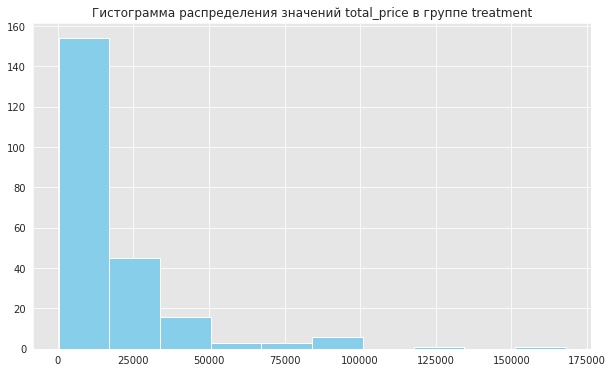

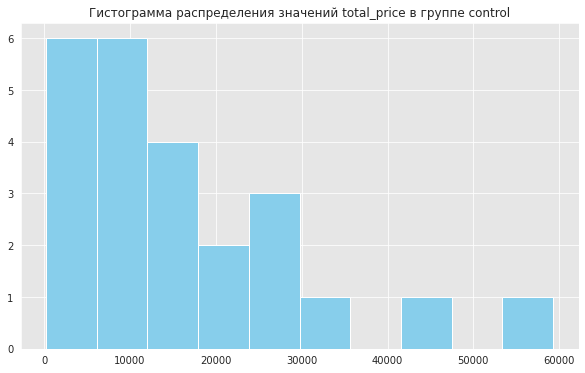

In [ ]:
orders_group = pd.merge(orders_AB, split_users, on='user_id', how='left')
orders_group = orders_group[~orders_group['group'].isna()] # В дальнейшем будем использовать датафрейм, хранящий заказы только для пользователей участников тестирования

for group in orders_group.group.unique():
  plot_data = orders_group[orders_group['group'] == group]

  plt.figure(figsize=(10, 6))

  plt.hist(plot_data['total_price'], color='skyblue')

  plt.title(f'Гистограмма распределения значений total_price в группе {group}')
  plt.show()

В контрольной группе выбросов не наблюдается. Тестовую группу отфильтруем по 99 перцентилю.

In [ ]:
orders_group = orders_group[orders_group['total_price'] < orders_group['total_price'].quantile(0.99)]

В данных нет ошибок и неожиданных пропусков, дубликаты очищены, выбросы удалены.

После фильтрации таблиц по user_id пользователей-участников эксперимента в таблице orders осталось всего 242 строки, что уже на этапе предобработки данных косвенно указывает на низкую конверсию канала.

In [ ]:
flawed_users = split_users.groupby('user_id')['group'].nunique().reset_index()
flawed_users = flawed_users[flawed_users['group'] > 1]
flawed_users.shape[0]

0

Юзеры, попавшие в обе группы эксперимента, отсутствуют.

In [ ]:
group_count = split_users.groupby('group')['user_id'].nunique()
group_count

group
control      1503
treatment    1465
Name: user_id, dtype: int64

Группы сопоставимы по размеру, разница составляет 38 пользователей.

Сравним качественный состав групп.

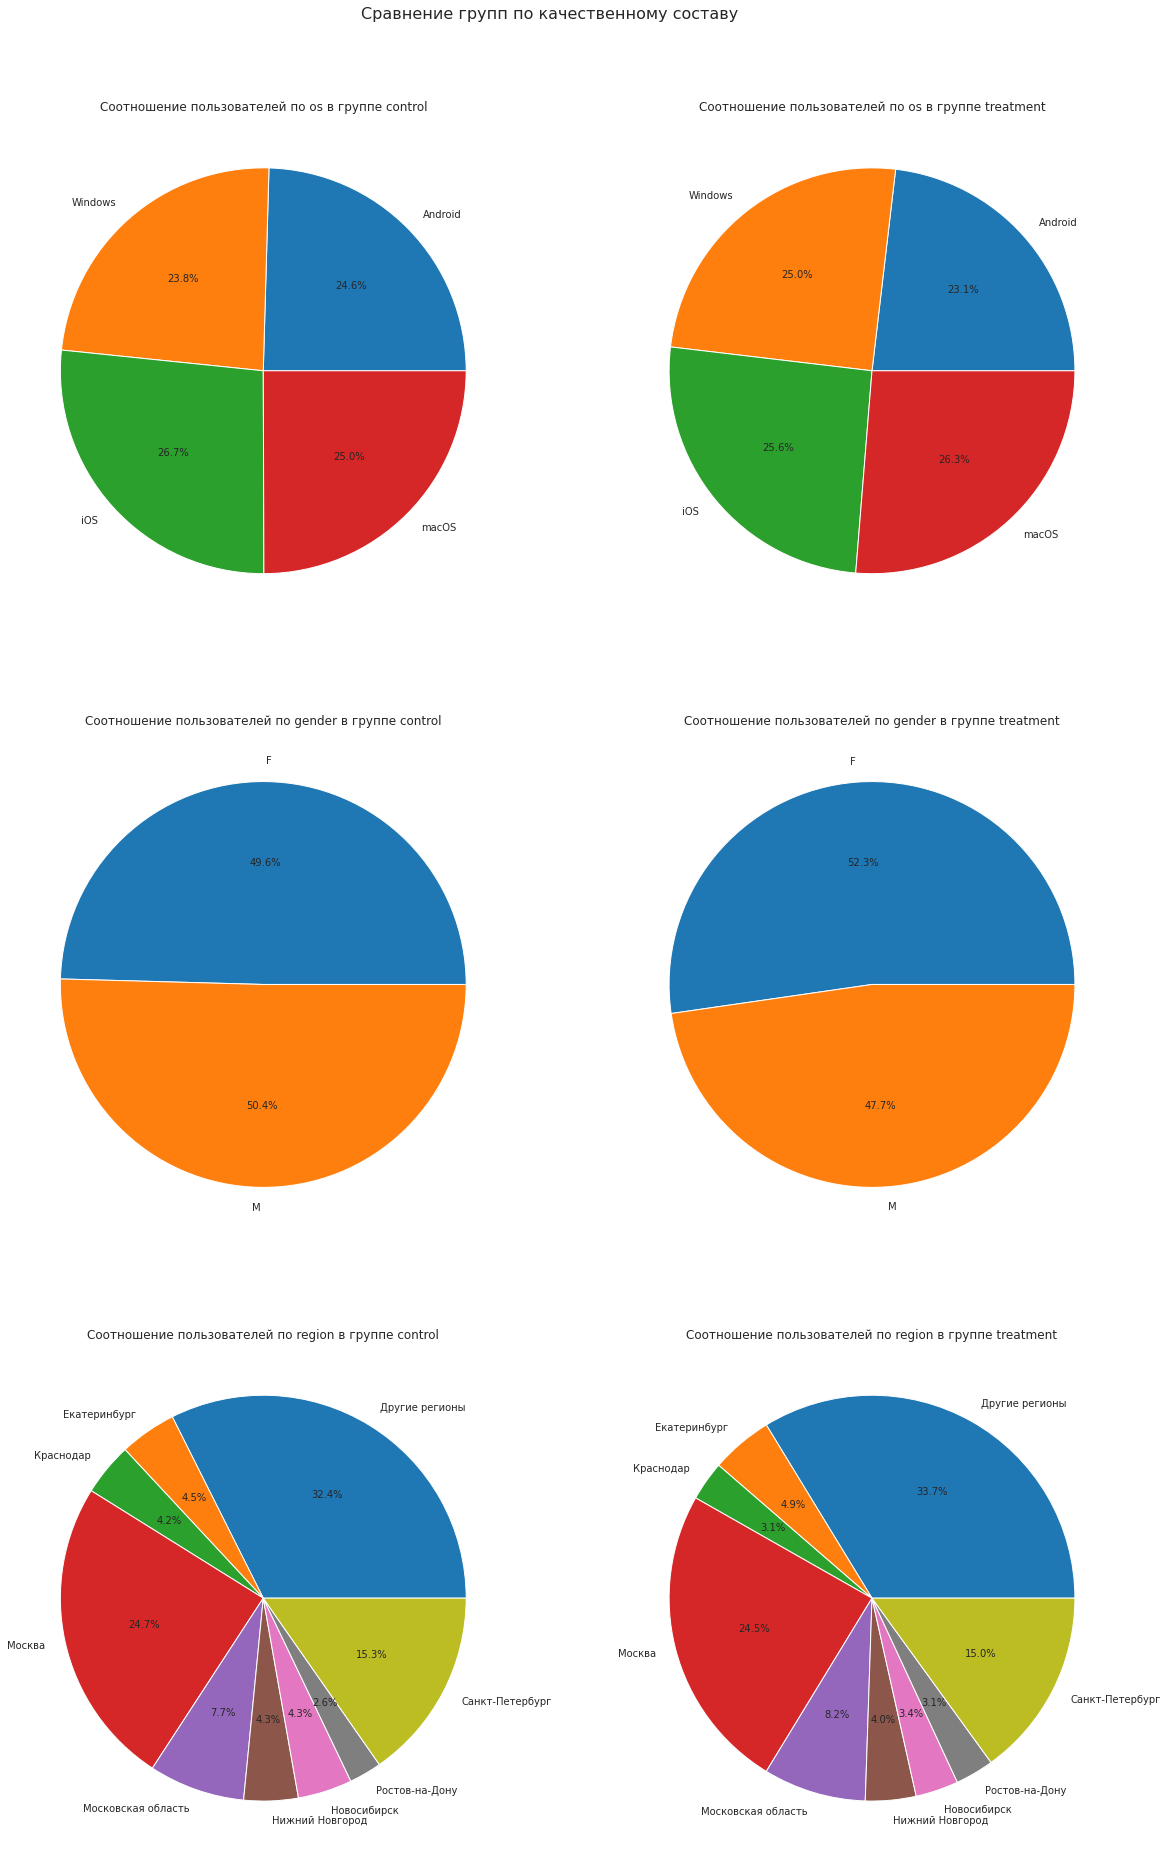

In [ ]:
group_data = pd.merge(users_AB, split_users, on='user_id', how='inner')

fig, axes = plt.subplots(3, 2, figsize=(20, 30))

for i, category in enumerate(['os', 'gender', 'region']):
  for j, group in enumerate(group_data.group.unique()):

    plot_data = group_data[group_data['group'] == group]
    plot_data = plot_data.groupby(category)['user_id'].nunique().reset_index()
    axes[i, j].pie(
        plot_data.user_id,
        labels=plot_data[category].unique(),
        autopct='%1.1f%%'
    )
    axes[i, j].set_title(f'Соотношение пользователей по {category} в группе {group}')


plt.suptitle('Сравнение групп по качественному составу', fontsize=16, y=0.98)
plt.subplots_adjust(top=0.93)
plt.show()

Группы похожи по составу. В тестовой группе немного перобладает женская аудитория, проверим статистическую значимость этого различия.

Доля женщин в тестовой и контрольной группах не различается.

      H0​:pA​=pB​
Доля женщин в группе контроля больше, чем в группе теста.

      H1​:pA​>pB​


In [ ]:
alpha = 0.05

stat_ztest, p_value_ztest = proportions_ztest(
      [group_data[(group_data['gender'] == 'F') & (group_data['group'] == 'treatment')]['user_id'].nunique(), group_data[(group_data['gender'] == 'F') & (group_data['group'] == 'control')]['user_id'].nunique()],
      [group_data[group_data['gender'] == 'F']['user_id'].nunique(), group_data[group_data['gender'] == 'F']['user_id'].nunique()],
      alternative='larger' # так как известно, что в контрольную группу попало больше женщин
)

if p_value_ztest > alpha:
      print(f'pvalue={p_value_ztest} > {alpha}')
      print('Разница между долей женщин в группах не является статистически значимой')
else:
      print(f'pvalue={p_value_ztest} < {alpha}')
      print('Разница между долей женщин в группах является статистически значимой', stat_ztest)

pvalue=0.2224290600578251 > 0.05
Разница между долей женщин в группах не является статистически значимой


In [ ]:
group_data

,user_id,registration_date,os,age,device,gender,region,browser,country,acq_channel,campaign_id,user_segment,buyer_segment,cohort_week,cohort_month,group
0,44965,2025-01-01 18:10:00,iOS,66,desktop,M,Новосибирск,Safari,Россия,TikTok,14.0,новичок,one_time,2024-12-30,2025-01-01,control
1,44967,2025-01-01 11:29:00,iOS,70,tablet,M,Московская область,Firefox,Россия,TikTok,13.0,новичок,rare,2024-12-30,2025-01-01,control
2,44968,2025-01-01 13:05:00,Android,68,mobile,F,Нижний Новгород,Edge,Россия,TikTok,10.0,спящий,regular,2024-12-30,2025-01-01,control
3,44969,2025-01-01 00:23:00,Windows,24,mobile,F,Краснодар,Chrome,Россия,TikTok,8.0,спящий,medium,2024-12-30,2025-01-01,treatment
4,44970,2025-01-01 06:33:00,iOS,50,tablet,M,Санкт-Петербург,Chrome,Россия,TikTok,2.0,спящий,regular,2024-12-30,2025-01-01,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,48902,2025-01-26 07:22:00,Android,27,tablet,F,Другие регионы,Safari,Россия,TikTok,8.0,VIP,regular,2025-01-20,2025-01-01,treatment
2964,48903,2025-01-26 17:55:00,iOS,51,tablet,M,Другие регионы,Firefox,Россия,TikTok,1.0,новичок,rare,2025-01-20,2025-01-01,control
2965,48904,2025-01-26 04:34:00,macOS,60,mobile,F,Другие регионы,Edge,Россия,TikTok,17.0,активный,medium,2025-01-20,2025-01-01,control
2966,48906,2025-01-26 21:25:00,macOS,57,tablet,F,Санкт-Петербург,Edge,Россия,TikTok,46.0,активный,rare,2025-01-20,2025-01-01,control


Сплит пользователей проведен корректно, можно приступать к анализу метрик и тестированию.

### Ключевая, вспомогательные и барьерная метрики.

#### Основная метрика

- **Конверсия в первую покупку** — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку  
  - *Цель:* увеличить конверсию с помощью бонуса  
  - *Критерий успеха:* статистически значимый рост конверсии в тестовой группе

#### Вспомогательные метрики

- **ARPU** (средняя выручка на пользователя TikTok)  
- **ARPPU** (средняя выручка на покупателя TikTok)  
- **AOV** (средний чек TikTok)

#### Барьерная метрика

- **Общая выручка от пользователей TikTok**

#### Конверсия в первую покупку

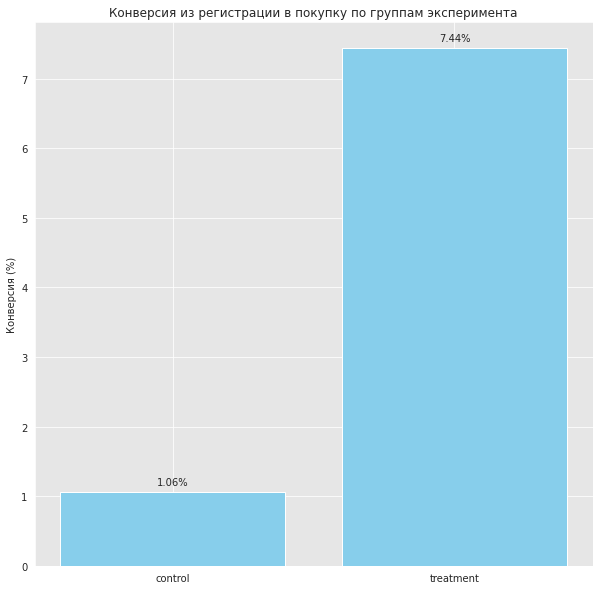

In [ ]:
monthly_registrations_group = group_data.groupby(['group'])['user_id'].nunique().reset_index(name = 'registered_users')

monthly_orders_group = orders_group.groupby(['group'])['user_id'].nunique().reset_index(name = 'total_orders')

conversion_group_df = pd.merge(monthly_registrations_group,
                            monthly_orders_group,
                            on='group',
                            how='inner')

conversion_group_df['conversion_rate'] = round((conversion_group_df['total_orders'] / conversion_group_df['registered_users']) * 100, 2)

plt.figure(figsize=(10, 10))

plt.bar(conversion_group_df['group'], conversion_group_df['conversion_rate'], color='skyblue')

for i, v in enumerate(conversion_group_df['conversion_rate']):
    plt.text(i, v + 0.1, f'{v}%', ha='center')

plt.title('Конверсия из регистрации в покупку по группам эксперимента')
plt.ylabel('Конверсия (%)')
plt.show()

Конверсия из регистрации в покупку повысилась более чем на 6% в тестовой группе по сравнению с контрольной.

Проверим статистическую значимость изменения.

Конверсия из регистрации в покупку в тестовой и контрольной группах не различается.

      H0​:pA​=pB​
Конверсия из регистрации в покупку в группе контроля больше, чем в группе теста.

      H1​:pA​>pB​


In [ ]:
stat_ztest, p_value_ztest = proportions_ztest(
      [conversion_group_df[conversion_group_df['group'] == 'treatment']['total_orders'], conversion_group_df[conversion_group_df['group'] == 'control']['total_orders']],
      [conversion_group_df[conversion_group_df['group'] == 'treatment']['registered_users'], conversion_group_df[conversion_group_df['group'] == 'control']['registered_users']],
      alternative='larger'
)

if p_value_ztest > alpha:
      print(f'pvalue={p_value_ztest} > {alpha}')
      print('Разница между конверсией из регистрации в покупку в группах не является статистически значимой')
else:
      print(f'pvalue={p_value_ztest} < {alpha}')
      print('Конверсия из регистрации в покупку в тестовой группе больше, чем в контрольной', stat_ztest)

pvalue=[2.66593555e-18] < 0.05
Конверсия из регистрации в покупку в тестовой группе больше, чем в контрольной [8.64603726]


Статистический z-тест пропорций подтвердил значимость увеличения коверсии в тестовой группе.

#### AOV

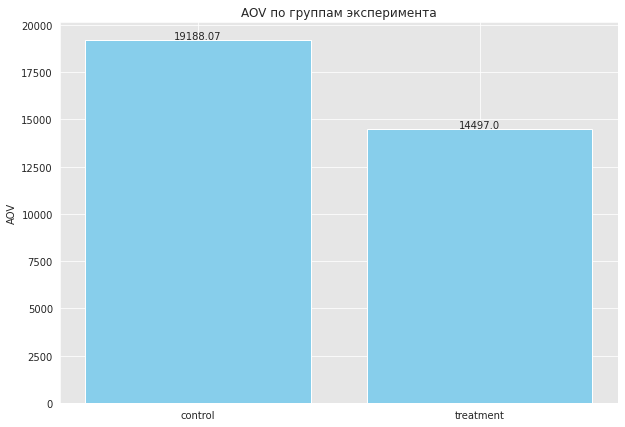

In [ ]:
aov_test = orders_group.groupby(['group', 'user_id'])['total_price'].mean().reset_index(name='aov')
aov_group = aov_test.groupby(['group'])['aov'].mean().reset_index(name='aov')

plt.figure(figsize=(10, 7))

plt.bar(aov_group['group'], aov_group['aov'], color='skyblue')

for i, v in enumerate(aov_group['aov']):
    plt.text(i, v + 50, f'{round(v, 2)}', ha='center')

plt.title('AOV по группам эксперимента')
plt.ylabel('AOV')
plt.show()

Средний чек пользователей тестовой группы изменился в тестовой группе по сравнению с контрольной (в тестовой почти на 5 тысяч меньше), что говорит том, что ранее малоактивные пользователи из TikTok являются менее платежеспособными, чем изначально активные с того же трафика.

Проверим, имеет ли значимость различие в среднем чеке между группами.

Гипотеза Н0: статичстически значимых различий среднего чека между группами нет

Гипотеза Н1: В тестовой группе средний чек статистически значимо ниже, чем в контрольной.

In [ ]:
p_value = ttest_ind(
    aov_test[aov_test['group'] == 'treatment']['aov'],
    aov_test[aov_test['group'] == 'control']['aov'],
    alternative='less'
).pvalue

if p_value > alpha:
  print(f'Различие не является статистически значимым, принимаем нулевую гипотезу.\np_value - {p_value}')
else:
  print(f'Различие статистически значимо, отвергаем нулевую гипотезу.\np_value - {p_value}')

Различие не является статистически значимым, принимаем нулевую гипотезу.
p_value - 0.1258873249995024


Изменение среднего чека не является значимым, однако стоит в дальнейшем проследить за динамикой этой метрики, в случае, если фича будет масштабирована.

#### ARPPU

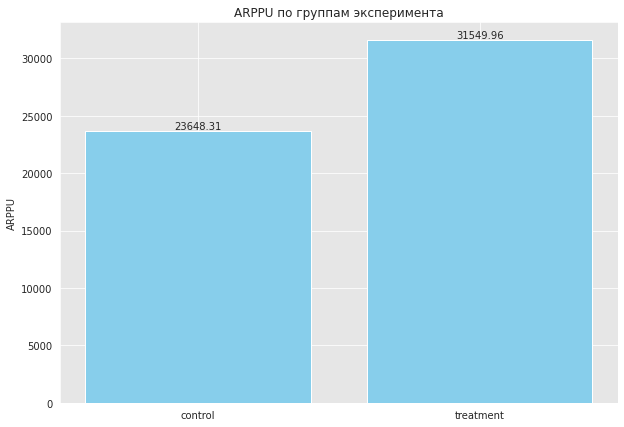

In [ ]:
arppu_test_data = orders_group.groupby(['user_id', 'group'])['total_price'].sum().reset_index(name='arppu')
arppu_group = arppu_test_data.groupby(['group'])['arppu'].mean().reset_index()

plt.figure(figsize=(10, 7))

plt.bar(arppu_group['group'], arppu_group['arppu'], color='skyblue')

for i, v in enumerate(arppu_group['arppu']):
    plt.text(i, v + 200, f'{round(v, 2)}', ha='center')

plt.title('ARPPU по группам эксперимента')
plt.ylabel('ARPPU')
plt.show()

Средняя выручка с платящего пользователя - ARPPU - увеличилась на 9 тысяч в тестовой группе, что говорит о том, что пользователи стали совершать покупки чаще.

Проверим статистическую значимость прироста.

Гипотеза Н0: статичстически значимых различий в выручке с платящего юзера между группами нет

Гипотеза Н1: В тестовой группе выручка с платящего юзера статистически значимо выше, чем в контрольной.

In [ ]:
p_value = ttest_ind(
    arppu_test_data[arppu_test_data['group'] == 'treatment']['arppu'],
    arppu_test_data[arppu_test_data['group'] == 'control']['arppu'],
    alternative='greater'
).pvalue

if p_value > alpha:
  print(f'Различие не является статистически значимым, принимаем нулевую гипотезу.\np_value - {p_value}')
else:
  print(f'Различие статистически значимо, отвергаем нулевую гипотезу.\np_value - {p_value}')

Различие не является статистически значимым, принимаем нулевую гипотезу.
p_value - 0.21819833818346368


Статистический тест показал, что статистически значимой разницы в средней выручке с платящего пользователя нет между группами эксперимента.

Такой вывод является ожидаемым, так как платящая часть пользователей с канала TikTok и на исторических данных показывала сравнительно неплохие результаты.

#### ARPU

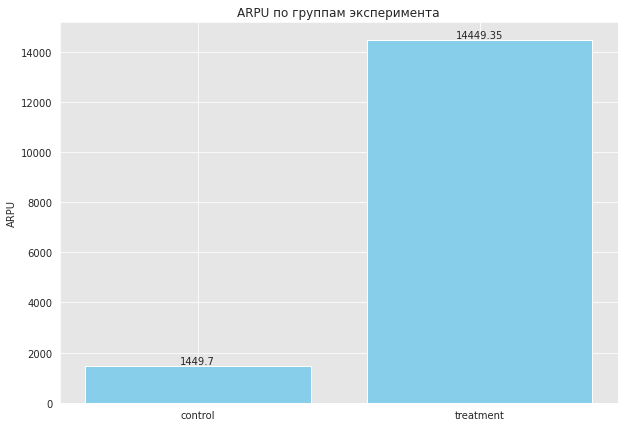

In [ ]:
events_group = pd.merge(events_AB, split_users, on='user_id', how='left')
events_group = events_group[~events_group['group'].isna()]

active_users_group = events_group.groupby('group')['user_id'].nunique().reset_index(name='unique_users')
total_price_group = orders_group.groupby('group')['total_price'].sum().reset_index(name='revenue')

arpu_group = pd.merge(active_users_group, total_price_group, on='group', how='inner')
arpu_group['arpu'] = arpu_group['revenue'] / arpu_group['unique_users']

arpu_test_data = pd.merge(events_group, orders_group, on=['user_id', 'group'], how='left')
arpu_test_data['total_price'] = arpu_test_data['total_price'].fillna(0)
arpu_test_data = arpu_test_data.groupby(['user_id', 'group'])['total_price'].sum().reset_index(name='arpu')

plt.figure(figsize=(10, 7))

plt.bar(arpu_group['group'], arpu_group['arpu'], color='skyblue')

for i, v in enumerate(arpu_group['arpu']):
    plt.text(i, v + 100, f'{round(v, 2)}', ha='center')

plt.title('ARPU по группам эксперимента')
plt.ylabel('ARPU')
plt.show()

Средний чек на активного юзера (включая не платящего) - ARPU - в 10 раз выше в тестовой группе, чем в контрольной, что говорит о том, что гораздо больший процент пользователей данного трафика конвертируются в покупателей после введения фичи.

Необходимо отметить, что выручка на активного пользователя для канала TikTok в тестовой группе приблизилась к значениям этой метрики по историческим данным успешного кейса трафика affiliate, впрочем как и ARPPU.

Можно с высокой уверенностью сказать, что такой рекордный рост имеет статистическую значимость, однако для чистоты эксперимента проведем эксперимент, чтобы окончательно в этом убедиться.

Гипотеза Н0: статичстически значимых различий в выручке с активного юзера между группами нет

Гипотеза Н1: В тестовой группе выручка с активного юзера статистически значимо выше, чем в контрольной.

In [ ]:
p_value = ttest_ind(
    arpu_test_data[arpu_test_data['group'] == 'treatment']['arpu'],
    arpu_test_data[arpu_test_data['group'] == 'control']['arpu'],
    alternative='greater'
).pvalue

if p_value > alpha:
  print(f'Различие не является статистически значимым, принимаем нулевую гипотезу.\np_value - {p_value}')
else:
  print(f'Различие статистически значимо, отвергаем нулевую гипотезу.\np_value - {p_value}')

Различие статистически значимо, отвергаем нулевую гипотезу.
p_value - 0.000398054238151949


Очевидное подтвердилось: прирост ARPU в тестовой группе имеет статистическую значимость.

#### Revenue

Общая выручка с пользователей (не умножаем на процент комиссии маркетплейса)

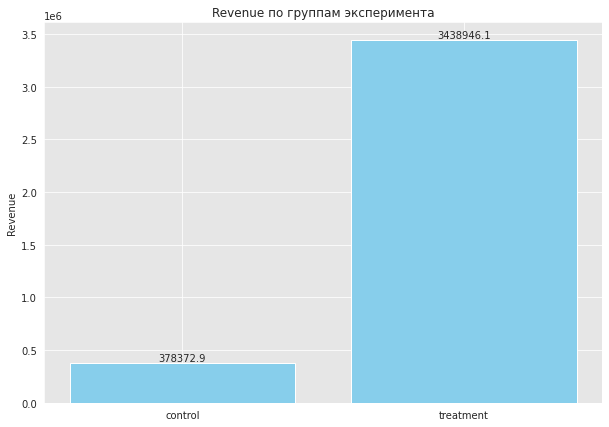

In [ ]:
revenue_group = orders_group.groupby('group')['total_price'].sum().reset_index(name='revenue')

plt.figure(figsize=(10, 7))

plt.bar(revenue_group['group'], revenue_group['revenue'], color='skyblue')

for i, v in enumerate(revenue_group['revenue']):
    plt.text(i, v + 20000, f'{round(v, 2)}', ha='center')

plt.title('Revenue по группам эксперимента')
plt.ylabel('Revenue')
plt.show()

Идентично ARPU, Revenue в тестовой группе увеличился в 10 раз.

Так как Revenue является барьерной метрикой и в рамках эксперимента имеет значение только то, чтобы она не упала, необходимости проводить статистический тест нет.

## Выводы по этапу 5

### Аналитическая записка по результатам A/B теста: Бонус на первую покупку для пользователей TikTok

---

#### **1. Краткое описание эксперимента**
Проведен A/B тест среди пользователей, привлеченных через TikTok, с целью проверки гипотезы: **предоставление бонуса на первую покупку увеличивает конверсию в первую покупку**. Эксперимент проводился в течение 3 недель с равномерным распределением пользователей между контрольной (без бонуса) и тестовой (с бонусом) группами. Предобработка данных включала стандартную очистку от дубликатов и выбросов (фильтрация по 99 перцентилю для тестовой группы).

---

#### **2. Результаты теста**

##### **2.1. Ключевая метрика: Конверсия в первую покупку**
- **Результат:** Конверсия в тестовой группе увеличилась на **6%** (статистически значимо, p-value < 0.05).
- **Вывод:** Гипотеза подтверждена. Бонус эффективно стимулирует первую покупку у пользователей TikTok.

##### **2.2. Вспомогательные метрики**
- **ARPU (выручка на пользователя):** Рост в **10 раз** в тестовой группе (1449 → 14449 рублей). Различие статистически значимо (p-value = 0.0004).
- **ARPPU (выручка на платящего пользователя):** Увеличение на 9 тыс. рублей (23648 → 31549 рублей), но **без статистической значимости** (p-value = 0.218).
- **AOV (средний чек):** Снижение на 5 тыс. рублей в тестовой группе (19188 → 14497 рублей), **без статистической значимости** (p-value = 0.126).

##### **2.3. Барьерная метрика**
- **Общая выручка:** Рост в **10 раз** (378 тыс. → 3.44 млн рублей). Метрика не ухудшилась.

---

#### **3. Проблемы эксперимента**
1. **Срочность запуска:** Эксперимент проведен без предварительного расчета мощности и MDE (Minimum Detectable Effect), что могло повлиять на интерпретацию второстепенных метрик.
2. **Низкая базовая конверсия TikTok:** Исходная конверсия канала крайне низка (в данных всего 242 заказа), что ограничивает обобщаемость результатов.
3. **Краткосрочный период:** Тест длился 3 недели, что не позволяет оценить долгосрочные эффекты (например, лояльность пользователей после использования бонуса).

---

#### **4. Рекомендации**
1. **Масштабировать бонусную программу** для пользователей TikTok, так как она значимо повышает конверсию и ARPU.
2. **Проверить ROI** перед полным запуском:
   - Оценить стоимость бонусов против дополнительной выручки.
   - Проанализировать, не приводит ли бонус к смещению в сторону низкомаржинальных покупок (снижение AOV).
3. **Мониторить долгосрочные эффекты:**
   - Retention пользователей, использовавших бонус.
   - Частота повторных покупок.
4. **Исключить гендерный дисбаланс** в будущих экспериментах (в тестовой группе была немного выше доля женщин, хотя различие не значимо).

---

#### **5. Выводы**
Эксперимент успешен: бонус на первую покупку **значимо увеличивает конверсию и выручку** для пользователей TikTok. Однако из-за низкой исходной конверсии канала и рисков стоимости бонусов рекомендуется **предварительно оценить окупаемость** (ROI) на расширенной выборке перед масштабированием.